In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
GDRIVE_DIR = "/content/gdrive/My Drive"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Structured Task**

### **Perform the analysis of Homework Assignment 3 question 3 using another type of static word embeddings: WORD2VEC**

In [2]:
# Download and extract the data and learn_decoder.py
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!unzip files.zip
!rm files.zip


--2023-06-23 10:16:26--  https://docs.google.com/uc?export=download&confirm=t&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56
Resolving docs.google.com (docs.google.com)... 142.251.163.138, 142.251.163.139, 142.251.163.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.163.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ut6tb78s9kkkerm512n8gpl3pdqle46s/1687515375000/01333689271208460322/*/1xZaorRH-xxjfochvSesAhOTUg82_Xq56?e=download&uuid=a4711bcf-84dd-44a2-954f-7603b0459240 [following]
--2023-06-23 10:16:27--  https://doc-0g-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ut6tb78s9kkkerm512n8gpl3pdqle46s/1687515375000/01333689271208460322/*/1xZaorRH-xxjfochvSesAhOTUg82_Xq56?e=download&uuid=a4711bcf-84dd-44a2-954f-7603b0459240
Resolving doc-0g-54-docs.googleusercontent.com (doc-0g-54-docs.googleusercontent.com)... 142.250.31.1

In [3]:
from gensim import downloader
WORD_2_VEC_PATH = 'word2vec-google-news-300'
model_word2vec = downloader.load(WORD_2_VEC_PATH)

In [4]:
from learn_decoder import *
#the voxels:
data = read_matrix("imaging_data.csv", sep=",")
#The names of the 180 concepts
concepts = np.genfromtxt('stimuli_180concepts.txt', dtype=np.dtype('U'))

In [5]:
import numpy as np
vectors_word2vec = np.zeros((180,300))
for i,concept in enumerate(concepts):
  print(concept)
  if concept not in model_word2vec.key_to_index:
    continue
  else:
    vectors_word2vec[i]=model_word2vec[concept]
vectors_word2vec

ability
accomplished
angry
apartment
applause
argument
argumentatively
art
attitude
bag
ball
bar
bear
beat
bed
beer
big
bird
blood
body
brain
broken
building
burn
business
camera
carefully
challenge
charity
charming
clothes
cockroach
code
collection
computer
construction
cook
counting
crazy
damage
dance
dangerous
deceive
dedication
deliberately
delivery
dessert
device
dig
dinner
disease
dissolve
disturb
do
doctor
dog
dressing
driver
economy
election
electron
elegance
emotion
emotionally
engine
event
experiment
extremely
feeling
fight
fish
flow
food
garbage
gold
great
gun
hair
help
hurting
ignorance
illness
impress
invention
investigation
invisible
job
jungle
kindness
king
lady
land
laugh
law
left
level
liar
light
magic
marriage
material
mathematical
mechanism
medication
money
mountain
movement
movie
music
nation
news
noise
obligation
pain
personality
philosophy
picture
pig
plan
plant
play
pleasure
poor
prison
professional
protection
quality
reaction
read
relationship
religious
residenc

array([[ 0.23828125,  0.125     , -0.05664062, ...,  0.06396484,
        -0.27929688,  0.02685547],
       [-0.14453125,  0.2578125 , -0.05517578, ..., -0.00720215,
         0.00139618, -0.05249023],
       [ 0.22265625,  0.08789062,  0.12597656, ...,  0.08886719,
         0.0859375 ,  0.04248047],
       ...,
       [-0.18652344,  0.16796875, -0.30273438, ...,  0.25      ,
         0.41210938,  0.02429199],
       [ 0.14355469, -0.00045967, -0.04760742, ..., -0.21289062,
        -0.06591797,  0.02148438],
       [ 0.359375  ,  0.04150391,  0.09033203, ..., -0.04077148,
        -0.08886719, -0.01391602]])

In [6]:
import numpy as np
def cosine_similarity(x: np.ndarray, y: np.ndarray) -> float:
    return(np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)))

In [7]:
foldsize = 10
num_concepts = 180
accuracy_scores_by_word2vec = np.zeros((18,10))
word_score = dict()

def calc_cosine(predicted_test,train_vec,test_vec,true_test):
  all_cosines = dict()
  for vec in train_vec:
    all_cosines[str(vec)] = cosine_similarity(predicted_test,vec)
  for vec in test_vec:
    all_cosines[str(vec)] = cosine_similarity(predicted_test,vec)

  sort_dict = dict(sorted(all_cosines.items(), key=lambda item: item[1], reverse = True))
  location=1
  for key in sort_dict.keys():
    if key == str(true_test):
      return location
    else:
      location +=1
  return location


for i in range(0,18):
  test_index = range(i*foldsize,(i+1)*foldsize)
  all = set(range(180))
  train_index = list(all-set(test_index))
  train = data[train_index, :]
  test = data[test_index, :]

  #use the vectors:
  train_vec = vectors_word2vec[train_index, :]
  test_vec = vectors_word2vec[test_index, :]

  #use the concepts:
  train_con = concepts[train_index]
  test_con = concepts[test_index]

  decoder_model= learn_decoder(train,train_vec)

  for j in range(0,10):
    predicted_test = np.dot(test[j],decoder_model)
    true_test = test_vec[j]
    final_rank_by_word2vec = calc_cosine(predicted_test,train_vec,test_vec,true_test)
    accuracy_scores_by_word2vec[i,j]= final_rank_by_word2vec
    current_word = test_con[j]
    word_score[current_word]= final_rank_by_word2vec


<ipython-input-6-6f8f9a96a844>:3: RuntimeWarning: invalid value encountered in double_scalars
  return(np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)))
<ipython-input-6-6f8f9a96a844>:3: RuntimeWarning: invalid value encountered in double_scalars
  return(np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)))
<ipython-input-6-6f8f9a96a844>:3: RuntimeWarning: invalid value encountered in double_scalars
  return(np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)))
<ipython-input-6-6f8f9a96a844>:3: RuntimeWarning: invalid value encountered in double_scalars
  return(np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)))
<ipython-input-6-6f8f9a96a844>:3: RuntimeWarning: invalid value encountered in double_scalars
  return(np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)))
<ipython-input-6-6f8f9a96a844>:3: RuntimeWarning: invalid value encountered in double_scalars
  return(np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)))
<ipython-input-6-6f8f9a96a844>:3: RuntimeWarning: invalid value encountered 

In [8]:
print(accuracy_scores_by_word2vec.shape)
avg_acc_score_by_word2vec=[]
for i in range(0,18):
  avg_acc_score_by_word2vec.append(np.mean(accuracy_scores_by_word2vec[i]))

(18, 10)


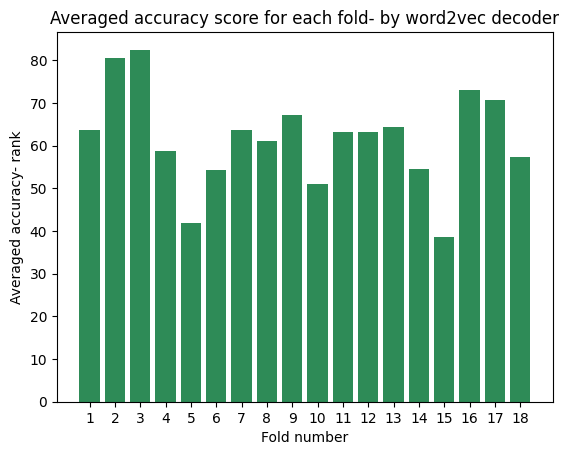

In [9]:
import matplotlib.pyplot as plt
plt.bar(range(1,19),avg_acc_score_by_word2vec,color="seagreen")
plt.title("Averaged accuracy score for each fold- by word2vec decoder")
plt.xlabel("Fold number")
plt.ylabel("Averaged accuracy- rank")
plt.xticks(range(1,19))
plt.show()

###**Comparing this results to Glove decoder:**

In [10]:
vectors_byGlove = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")

In [11]:
foldsize = 10
num_concepts = 180
accuracy_scores_byGlove = np.zeros((18,10))
word_score = dict()

def calc_cosine(predicted_test,train_vec,test_vec,true_test):
  all_cosines = dict()
  for vec in train_vec:
    all_cosines[str(vec)] = cosine_similarity(predicted_test,vec)
  for vec in test_vec:
    all_cosines[str(vec)] = cosine_similarity(predicted_test,vec)

  sort_dict = dict(sorted(all_cosines.items(), key=lambda item: item[1], reverse = True))
  location=1
  for key in sort_dict.keys():
    if key == str(true_test):
      return location
    else:
      location +=1
  return location


for i in range(0,18):
  test_index = range(i*foldsize,(i+1)*foldsize)
  all = set(range(180))
  train_index = list(all-set(test_index))
  train = data[train_index, :]
  test = data[test_index, :]

  #use the vectors:
  train_vec = vectors_byGlove[train_index, :]
  test_vec = vectors_byGlove[test_index, :]

  #use the concepts:
  train_con = concepts[train_index]
  test_con = concepts[test_index]

  decoder_model= learn_decoder(train,train_vec)

  for j in range(0,10):
    predicted_test = np.dot(test[j],decoder_model)
    true_test = test_vec[j]
    final_rank_byGlove = calc_cosine(predicted_test,train_vec,test_vec,true_test)
    accuracy_scores_byGlove[i,j]= final_rank_byGlove
    current_word = test_con[j]
    word_score[current_word]= final_rank_byGlove


In [12]:
accuracy_scores_byGlove.shape
avg_acc_score_byGlove=[]
for i in range(0,18):
  avg_acc_score_byGlove.append(np.mean(accuracy_scores_byGlove[i]))

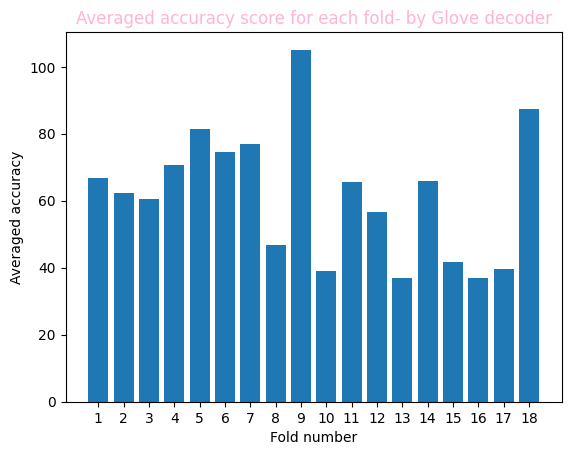

In [13]:
import matplotlib.pyplot as plt

plt.bar(range(1,19),avg_acc_score_byGlove)
plt.title("Averaged accuracy score for each fold- by Glove decoder",color='hotpink',alpha=0.5)
plt.xlabel("Fold number")
plt.ylabel("Averaged accuracy")
plt.xticks(range(1,19))
plt.show()

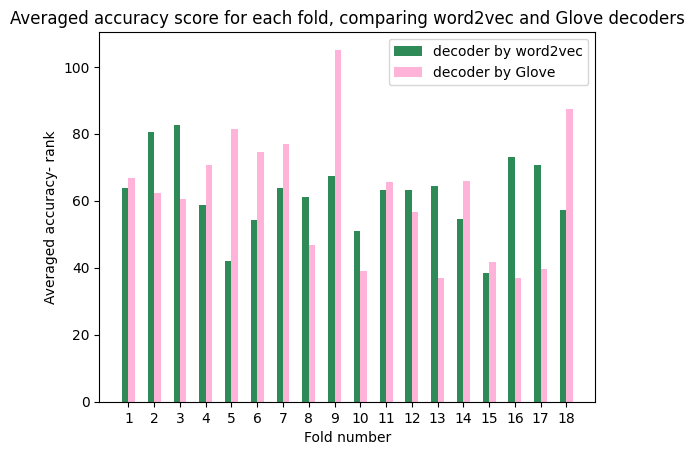

In [14]:
plt.bar(np.arange(1,19),avg_acc_score_by_word2vec,0.25,label = 'decoder by word2vec',color="seagreen")
plt.bar(np.arange(1,19)+0.25,avg_acc_score_byGlove,0.25, label = 'decoder by Glove',color='hotpink',alpha=0.5)
plt.title("Averaged accuracy score for each fold, comparing word2vec and Glove decoders")
plt.xlabel("Fold number")
plt.ylabel("Averaged accuracy- rank")
plt.xticks(np.arange(1,19) + 0.25 / 2,np.arange(1,19))
plt.legend()
plt.show()

**We can see from the graph above that there are some folders where the avarage rank by the Glove decoder is higher and others where the Word2Vec decoder is higher. We can't identify a specific pattern when comparing those decoding methods.**

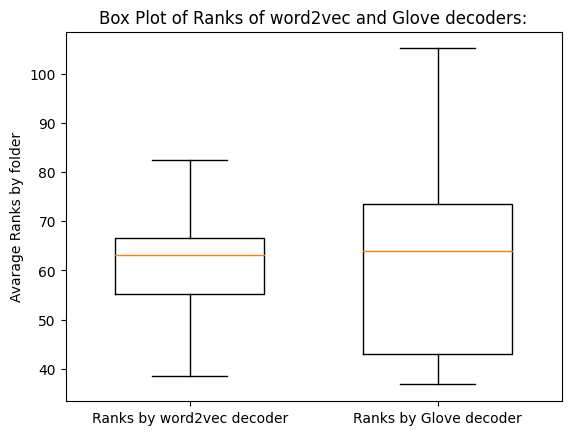

In [15]:

fig, ax = plt.subplots()
ax.boxplot(avg_acc_score_by_word2vec, positions=[1], widths=0.6)
ax.boxplot(avg_acc_score_byGlove, positions=[2], widths=0.6)

ax.set_xticklabels(['Ranks by word2vec decoder', 'Ranks by Glove decoder'])

ax.set_ylabel('Avarage Ranks by folder')

ax.set_title('Box Plot of Ranks of word2vec and Glove decoders:')

# Display the plot
plt.show()

**In order to compare the decoding methods, we used boxplots. <br> There are 18 samples for each dataset- each sample represents the average rank for a specific fold (for a specific method- one for Glove and one for Word2Vec). <br> We can see that the Glove decoder gets a wider IQR which is the range between the 25th percentile and the 75th percentile. That means the Glove has a higher variance between its folder's average ranks. When comparing the median of both methods we can see it's similar.**

###**Read Pereria et al.,2018 and describe the similarities and differences between analyzes 1,2 and 3 in that paper:**

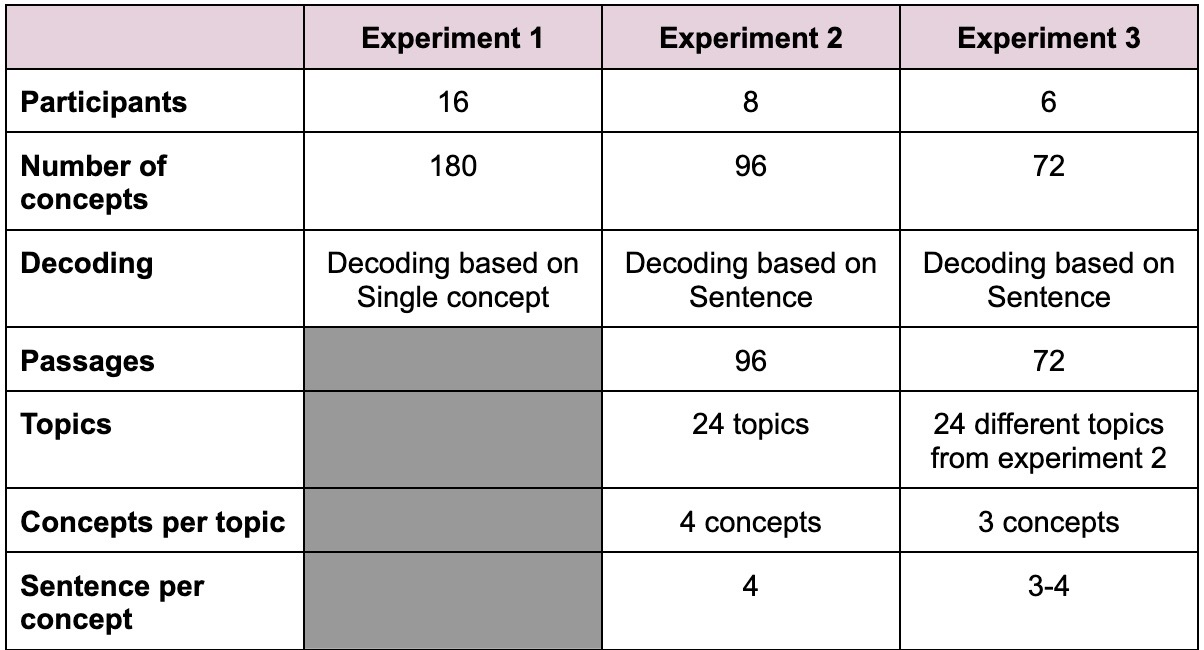

### **Evaluation of performance of Glove decoder via Rank accuracy on experiments 2&3:**

In [16]:
#download data:
!gdown --folder https://drive.google.com/drive/folders/1gFIrqTvvi6wsowcN3U2iZiVDvEC3fuxq
!mv -v "Structured Task (sentence decoding)"/* ./

Retrieving folder list
Processing file 11wWOcMZQfB2VAZ1VKAz9sWavnUwFeZkB EXP2.pkl
Processing file 1FTDnwEjuX3OA8P18TaiUshAo8uHgmiXU EXP3.pkl
Processing file 1spJFNztbmoaxBbExPOxQcU00RD3iMLcR neuralData_for_EXP1.csv
Processing file 1BXiBLt11U-RuboKedAtRgpnVR3D3qVnF stimuli_243sentences.txt
Processing file 1hnC7-MqCHtyC57poXPQNi5kfCITFsclD stimuli_384sentences.txt
Processing file 1xipjPAuRc7gOtwQjbIjKgdrU5TWVs1oF vectors_243sentences.GV42B300.average.txt
Processing file 1U-WxrRuyC3TsGW1vjQsmgj3jow7NMx8b vectors_384sentences.GV42B300.average.txt
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=11wWOcMZQfB2VAZ1VKAz9sWavnUwFeZkB
To: /content/Structured Task (sentence decoding)/EXP2.pkl
100% 597M/597M [01:40<00:00, 5.95MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FTDnwEjuX3OA8P18TaiUshAo8uHgmiXU
To: /content/Structured Task (sentence decoding)/EXP3.pkl
100% 387M/387M [00:03<0

In [17]:
#pickle exp2:
import pickle
pickle_path = open ("EXP2.pkl", "rb")
pickle2 = pickle.load(pickle_path)
pickle_path.close()

In [18]:
import numpy as np
with open("/content/stimuli_384sentences.txt", "r") as concepts2_path:
    concepts2 = np.asarray(concepts2_path.readlines())

In [19]:
data2 = pickle2['Fmridata']
vectors2 = read_matrix("/content/vectors_384sentences.GV42B300.average.txt", sep=" ")

In [20]:
import pandas as pd
data_original2 = pd.read_csv("neuralData_for_EXP1.csv")


In [21]:
data_original2

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,185856,185857,185858,185859,185860,185861,185862,185863,185864,185865
0,0,-8.173708,-5.593922,-4.737303,-3.210317,-5.064872,-2.867938,-0.647879,0.630494,4.112772,...,23.007180,15.161489,-10.211452,-15.066769,-7.162252,-12.148584,-7.709421,-8.667380,-7.432775,-1.341048
1,1,14.175880,12.258254,15.118346,16.929986,14.128274,7.703238,5.102477,7.847398,13.293932,...,32.169971,23.818106,11.242535,10.213672,11.618843,11.568193,16.380403,6.865870,19.064210,3.893508
2,2,11.025751,9.451916,11.282665,10.330555,9.168634,6.326451,8.325448,11.559850,10.385498,...,11.159157,5.839374,-29.386549,-38.144211,-22.866592,-25.429646,-11.122913,-15.491569,-8.743717,-13.216781
3,3,-9.224141,-10.744989,-12.231927,-9.563610,-2.367995,-2.873559,-2.707560,-2.943065,-0.751547,...,22.441511,20.071060,12.036822,9.080935,15.576979,21.669859,11.972719,21.229646,6.781682,13.736124
4,4,-11.051150,-14.732372,-17.551868,-14.449508,-8.301250,-5.309789,-3.145870,-6.857210,-13.070992,...,4.275233,-3.619274,-14.709950,-12.471845,-10.840275,5.344355,-12.400245,13.086634,-17.702188,2.824599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,11.149028,7.978983,12.695126,20.448079,15.767247,13.632171,17.911331,18.114417,15.414930,...,19.852258,9.466715,6.668198,-3.242721,11.572321,0.200551,13.690230,6.364983,11.205963,7.086703
176,176,6.803068,4.498483,2.461451,-1.275139,2.833723,4.297033,5.976017,4.735031,-1.982130,...,8.441129,4.905574,-6.411029,-18.038849,4.376191,-7.987965,7.501014,-0.302577,-2.531842,-1.172034
177,177,22.786007,15.820983,17.528539,16.826328,26.509907,17.351106,15.254802,17.227273,15.728924,...,-1.292304,-2.299655,-7.816803,-22.243332,0.516129,-15.604818,6.248949,-10.164152,1.479727,-11.286983
178,178,-2.651913,-2.241164,-9.519173,-19.332622,-12.876832,-7.773406,-8.987257,-17.322617,-27.816518,...,-9.491118,-12.964502,-19.570378,-7.898798,-15.110231,9.939994,-11.334372,18.573976,-11.782496,8.814806


#### **Evaluation on experiment 2:**

In [22]:
def calc_cosine(predicted_test,train_vec,test_vec,true_test):
  all_cosines = dict()
  locations = np.zeros(len(predicted_test))
  print("predicted_test",len(predicted_test))
  print("train_vec",len(train_vec))
  print("test_vec",len(test_vec))
  print("true_test",len(true_test))
  for i in range(len(predicted_test)):
    predicted_test_vec = predicted_test[i]
    true_test_vec = true_test[i]
    for vec1 in test_vec:
      all_cosines[str(vec1)] = cosine_similarity(predicted_test_vec,vec1)

    sort_dict = dict(sorted(all_cosines.items(), key=lambda item: item[1], reverse = True))
    location=1

    for key in sort_dict.keys():
      if key == str(true_test_vec):
        locations[i] = location
        break
      else:
        location +=1
  return locations


train = data_original2.to_numpy()[:,1:]
test = data2

train_vec = vectors_byGlove
test_vec = vectors2


decoder_model= learn_decoder(train,train_vec)
predicted_test = np.dot(test,decoder_model)
true_test = test_vec
final_rank2 = calc_cosine(predicted_test,train_vec,test_vec,true_test)



predicted_test 384
train_vec 180
test_vec 384
true_test 384


In [23]:
x_values= []
x_counts = []
list_final2 = list(final_rank2)
for x in set(final_rank2):
  x_values.append(x)
  x_counts.append(list_final2.count(x))

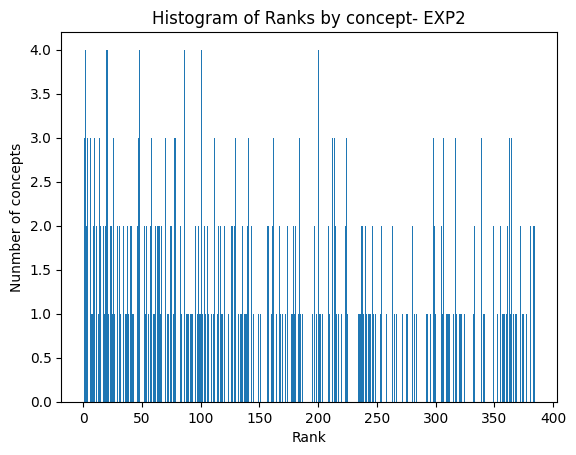

In [24]:
import matplotlib.pyplot as plt
plt.bar(x_values,x_counts)
plt.title("Histogram of Ranks by concept- EXP2")
plt.xlabel("Rank")
plt.ylabel("Nunmber of concepts")

plt.show()

In [25]:
list_50 = []
list_100 = []
list_150 = []
list_200 = []
list_250 = []
list_300 = []
list_350 = []
list_400 = []
for rank in final_rank2:
  if rank < 50:
    list_50.append(rank)
  elif rank < 100:
    list_100.append(rank)
  elif rank < 150:
    list_150.append(rank)
  elif rank < 200:
    list_200.append(rank)
  elif rank < 250:
    list_250.append(rank)
  elif rank < 300:
    list_300.append(rank)
  elif rank < 350:
    list_350.append(rank)
  else:
    list_400.append(rank)

In [26]:
x_ = [0,50,100,150,200,250,300,350]
y_ = [np.mean(list_50), np.mean(list_100),np.mean(list_150),np.mean(list_200),np.mean(list_250),np.mean(list_300),np.mean(list_350),np.mean(list_400)]

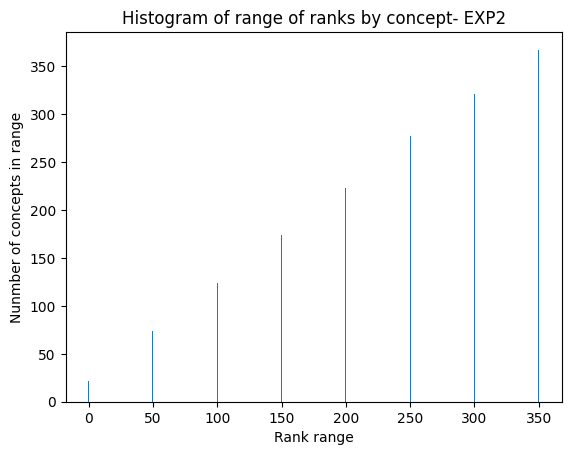

In [27]:
import matplotlib.pyplot as plt
plt.bar(x_,y_)
plt.title("Histogram of range of ranks by concept- EXP2")
plt.xlabel("Rank range")
plt.ylabel("Nunmber of concepts in range")
plt.show()

In [28]:
s2 = pd.Series (list_final2)

In [29]:
s2.describe()

count    384.000000
mean     156.927083
std      113.403851
min        1.000000
25%       59.500000
50%      135.500000
75%      240.250000
max      384.000000
dtype: float64

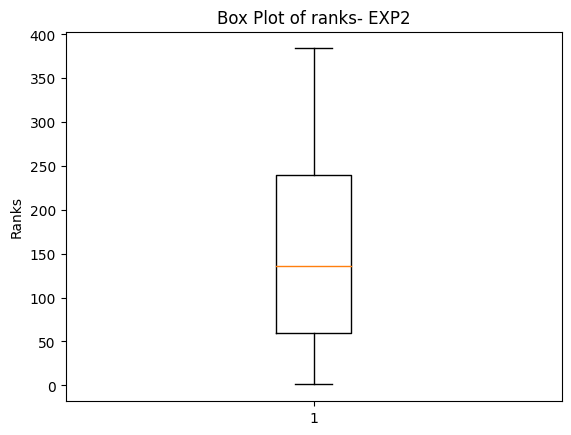

In [30]:
plt.boxplot(list_final2)
plt.ylabel("Ranks")
plt.title("Box Plot of ranks- EXP2")
plt.show()

#### **Evaluation on experiment 3:**

In [31]:
#pickle exp3:
import pickle
pickle_path = open ("EXP3.pkl", "rb")
pickle3 = pickle.load(pickle_path)
pickle_path.close()

In [32]:
with open("/content/stimuli_243sentences.txt", "r") as concepts3_path:
    concepts3 = np.asarray(concepts3_path.readlines())

In [33]:
data3 = pickle3['Fmridata']
vectors3 = read_matrix("/content/vectors_243sentences.GV42B300.average.txt", sep=" ")

In [34]:
def calc_cosine(predicted_test,train_vec,test_vec,true_test):
  all_cosines = dict()
  locations = np.zeros(len(predicted_test))
  print("predicted_test",len(predicted_test))
  print("train_vec",len(train_vec))
  print("test_vec",len(test_vec))
  print("true_test",len(true_test))
  for i in range(len(predicted_test)):
    predicted_test_vec = predicted_test[i]
    true_test_vec = true_test[i]
    for vec1 in test_vec:
      all_cosines[str(vec1)] = cosine_similarity(predicted_test_vec,vec1)

    sort_dict = dict(sorted(all_cosines.items(), key=lambda item: item[1], reverse = True))
    location=1

    for key in sort_dict.keys():
      if key == str(true_test_vec):
        locations[i] = location
        break
      else:
        location +=1
  return locations


train = data_original2.to_numpy()[:,1:]
test = data3

train_vec = vectors_byGlove
test_vec = vectors3


decoder_model= learn_decoder(train,train_vec)
predicted_test = np.dot(test,decoder_model)
true_test = test_vec
final_rank3 = calc_cosine(predicted_test,train_vec,test_vec,true_test)



predicted_test 243
train_vec 180
test_vec 243
true_test 243


In [35]:
x_values= []
x_counts = []
list_final3 = list(final_rank3)
for x in set(final_rank3):
  x_values.append(x)
  x_counts.append(list_final3.count(x))

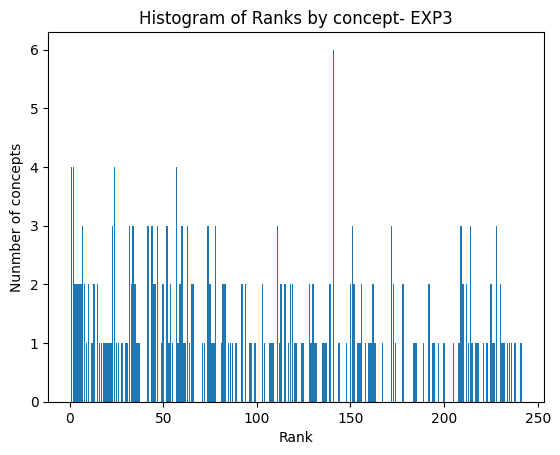

In [36]:
import matplotlib.pyplot as plt
plt.bar(x_values,x_counts)
plt.title("Histogram of Ranks by concept- EXP3")
plt.xlabel("Rank")
plt.ylabel("Nunmber of concepts")


plt.show()

In [37]:
list_50 = []
list_100 = []
list_150 = []
list_200 = []
list_250 = []
for rank in final_rank3:
  if rank < 50:
    list_50.append(rank)
  elif rank < 100:
    list_100.append(rank)
  elif rank < 150:
    list_150.append(rank)
  elif rank < 200:
    list_200.append(rank)
  else:
    list_250.append(rank)

In [38]:
x_ = [50,100,150,200,250]
y_ = [np.mean(list_50), np.mean(list_100),np.mean(list_150),np.mean(list_200),np.mean(list_250)]

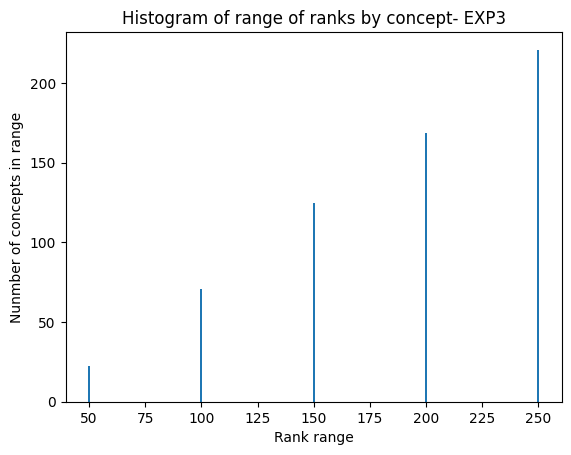

In [39]:
import matplotlib.pyplot as plt
plt.bar(x_,y_)
plt.title("Histogram of range of ranks by concept- EXP3")
plt.xlabel("Rank range")
plt.ylabel("Nunmber of concepts in range")
plt.show()

In [40]:
s3 = pd.Series (list_final3)
s3.describe()

count    243.000000
mean     100.744856
std       71.528708
min        1.000000
25%       42.000000
50%       86.000000
75%      154.500000
max      241.000000
dtype: float64

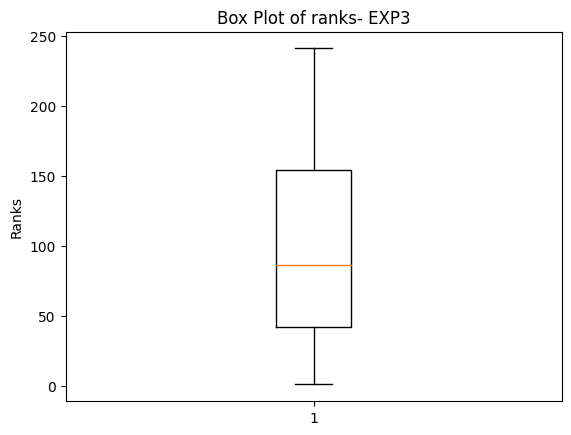

In [41]:
plt.boxplot(list_final3)
plt.ylabel("Ranks")
plt.title("Box Plot of ranks- EXP3")
plt.show()

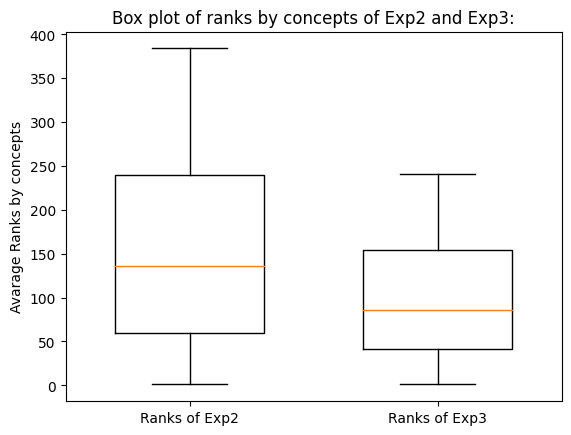

In [42]:
fig, ax = plt.subplots()
ax.boxplot(list_final2, positions=[1], widths=0.6)
ax.boxplot(list_final3, positions=[2], widths=0.6)

ax.set_xticklabels(['Ranks of Exp2', 'Ranks of Exp3'])

ax.set_ylabel('Avarage Ranks by concepts')

ax.set_title('Box plot of ranks by concepts of Exp2 and Exp3:')

# Display the plot
plt.show()

###**Analysis of Rank score on experiments 2&3 by topics:**

#### **Evaluation on experiment 2:**

In [43]:
keyPassageCategory2 = pickle2['keyPassageCategory']
keyPassages2 = pickle2['keyPassages']
keySentences2 = pickle2['keySentences']
labelsPassageCategory2 = pickle2['labelsPassageCategory']
labelsPassageForEachSentence2 = pickle2['labelsPassageForEachSentence']
labelsSentences2 = pickle2['labelsSentences']


In [44]:
dict_of_passages = dict()
for i,rank in enumerate(final_rank2):
  passage_id = labelsPassageForEachSentence2[i][0]
  if str(passage_id) not in dict_of_passages.keys():
    dict_of_passages[str(passage_id)]= [rank]
  else:
    dict_of_passages[str(passage_id)].append(rank)

In [45]:
topics = dict()
for (key, value),item in zip(dict_of_passages.items(),labelsPassageCategory2):
  topic_id= item[0]
  if str(topic_id) not in topics.keys():
    topics[str(topic_id)]= value
  else:
    topics[str(topic_id)] += value

In [46]:
topics_avg_rank = dict()
for key,value in topics.items():
  topics_avg_rank[key] = np.mean(value)
sort_topics_avg_rank = dict(sorted(topics_avg_rank.items(), key=lambda item: item[1], reverse = False))

In [47]:
topics_avg_rank = dict()
for key,value in topics.items():
  topics_avg_rank[key] = np.mean(value)
sort_topics_avg_rank = dict(sorted(topics_avg_rank.items(), key=lambda item: item[1], reverse = False))

In [48]:
labels_topics_avg_rank = dict()
for key,value in sort_topics_avg_rank.items():
  location = int(key) -1
  topic = keyPassageCategory2[0][location][0]
  labels_topics_avg_rank[topic] = value

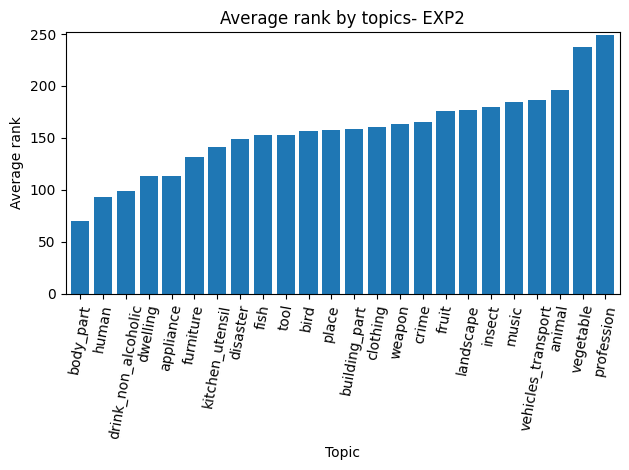

<Figure size 7000x1500 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt
plt.bar(labels_topics_avg_rank.keys(),labels_topics_avg_rank.values())
plt.xticks(rotation = 80 , size = 10)
plt.title("Average rank by topics- EXP2")
plt.xlabel("Topic")
plt.ylabel("Average rank")
plt.margins(0.01)
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

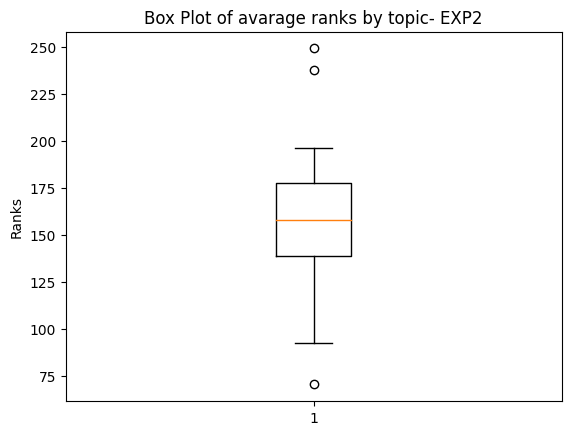

In [50]:
plt.boxplot(labels_topics_avg_rank.values())
plt.ylabel("Ranks")
plt.title("Box Plot of avarage ranks by topic- EXP2")
plt.show()

#### **Evaluation on experiment 3:**

In [51]:
keyPassageCategory3 = pickle3['keyPassageCategory']
keyPassages3 = pickle3['keyPassages']
keySentences3 = pickle3['keySentences']
labelsPassageCategory3 = pickle3['labelsPassageCategory']
labelsPassageForEachSentence3 = pickle3['labelsPassageForEachSentence']
labelsSentences3= pickle3['labelsSentences']

In [52]:
dict_of_passages3 = dict()
for i,rank in enumerate(final_rank3):
  passage_id = labelsPassageForEachSentence2[i][0]
  if str(passage_id) not in dict_of_passages3.keys():
    dict_of_passages3[str(passage_id)]= [rank]
  else:
    dict_of_passages3[str(passage_id)].append(rank)

In [53]:
topics3 = dict()
for (key, value),item in zip(dict_of_passages3.items(),labelsPassageCategory3):
  topic_id= item[0]
  if str(topic_id) not in topics3.keys():
    topics3[str(topic_id)]= value
  else:
    topics3[str(topic_id)] += value

In [54]:
topics_avg_rank3 = dict()
for key,value in topics3.items():
  topics_avg_rank3[key] = np.mean(value)
sort_topics_avg_rank3 = dict(sorted(topics_avg_rank3.items(), key=lambda item: item[1], reverse = False))

In [55]:
labels_topics_avg_rank3 = dict()
for key,value in sort_topics_avg_rank3.items():
  location = int(key) -1
  topic = keyPassageCategory3[0][location][0]
  labels_topics_avg_rank3[topic] = value

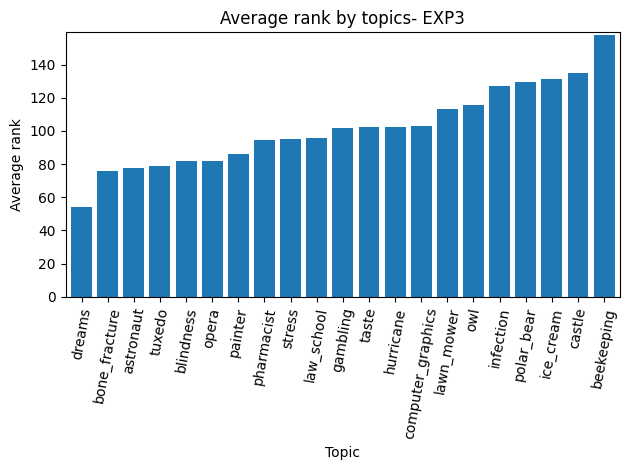

<Figure size 7000x1500 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt
plt.bar(labels_topics_avg_rank3.keys(),labels_topics_avg_rank3.values())
plt.xticks(rotation = 80 , size = 10)
plt.title("Average rank by topics- EXP3")
plt.xlabel("Topic")
plt.ylabel("Average rank")
plt.margins(0.01)
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

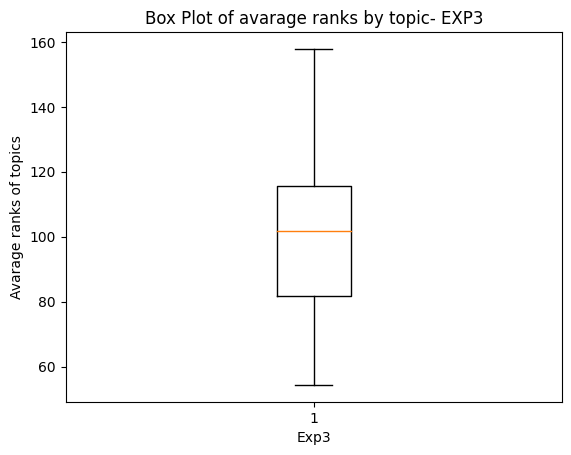

In [57]:
plt.boxplot(labels_topics_avg_rank3.values(),showmeans=False)
plt.ylabel("Avarage ranks of topics")
plt.xlabel("Exp3")
plt.title("Box Plot of avarage ranks by topic- EXP3")
plt.show()

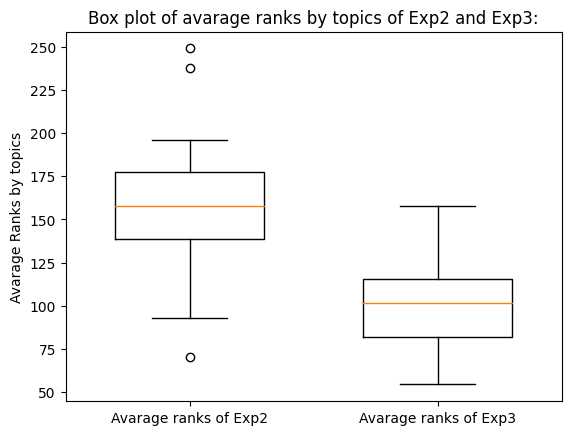

In [58]:
fig, ax = plt.subplots()
ax.boxplot(labels_topics_avg_rank.values(), positions=[1], widths=0.6)
ax.boxplot(labels_topics_avg_rank3.values(), positions=[2], widths=0.6)

ax.set_xticklabels(['Avarage ranks of Exp2', 'Avarage ranks of Exp3'])

ax.set_ylabel('Avarage Ranks by topics')

ax.set_title('Box plot of avarage ranks by topics of Exp2 and Exp3:')

# Display the plot
plt.show()

### **Semi-structured Tasks**

**Train a decoder model on the dataset from analysis2 or analysis3 - we choose analysis2. We used both: <br>
(1) the sentence representations that were used
in the paper (the same representations from the structured task)
(2) sentence representations as extracted from a contextualized word embedding model- we choose BERT.
Report and compare the results from both methods**

In [59]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
from transformers import BertTokenizer, BertModel

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [61]:
import numpy as np
import torch
vectors_bert = np.zeros((384,768))
for i,concept in enumerate(concepts2):
  tokens = tokenizer.encode(concept, add_special_tokens=False)
  input_ids = torch.tensor([tokens])
  with torch.no_grad():
    outputs = model_bert(input_ids)
    embeded_vec = outputs.last_hidden_state
    embeded_vec = embeded_vec[0]
    if embeded_vec.shape == (1,768):
      vectors_bert[i] = embeded_vec
    else:
      mean_vec= torch.mean(embeded_vec,axis=0)
      vectors_bert[i] =mean_vec
    if vectors_bert[i] == torch.zeros((768,)):
      print("hi")
vectors_bert

array([[-0.20444359,  0.21395849,  0.25981605, ..., -0.30014774,
         0.39032239,  0.20660156],
       [-0.01009661, -0.36131924,  0.52748781, ...,  0.07609162,
         0.28983498,  0.61476219],
       [ 0.30251774,  0.34662178,  0.61628783, ..., -0.48596635,
         0.04252791,  0.21972521],
       ...,
       [-0.03683804,  0.14737633,  0.44895884, ..., -0.58903617,
        -0.23233488,  0.38757038],
       [ 0.28544638,  0.02812733,  0.24986847, ..., -0.36228698,
        -0.01686121,  0.15700749],
       [-0.01157325,  0.18084337, -0.02618169, ..., -0.56372011,
         0.05074405,  0.18518586]])

In [62]:
vectors_bert.shape

(384, 768)

In [63]:
foldsize = 24
num_concepts = 384
accuracy_scores_byBert = np.zeros((16,24))
word_score = dict()

def calc_cosine(predicted_test,train_vec,test_vec,true_test):
  all_cosines = dict()
  for vec in train_vec:
    all_cosines[str(vec)] = cosine_similarity(predicted_test,vec)
  for vec in test_vec:
    all_cosines[str(vec)] = cosine_similarity(predicted_test,vec)

  sort_dict = dict(sorted(all_cosines.items(), key=lambda item: item[1], reverse = True))
  location=1
  for key in sort_dict.keys():
    if key == str(true_test):
      return location
    else:
      location +=1
  return location


for i in range(0,16):
  test_index = range(i*foldsize,(i+1)*foldsize)
  all = set(range(384))
  train_index = list(all-set(test_index))
  train = data2[train_index, :]
  test = data2[test_index, :]

  #use the vectors:
  train_vec = vectors_bert[train_index, :]
  test_vec = vectors_bert[test_index, :]

  #use the concepts:
  train_con = concepts2[train_index]
  test_con = concepts2[test_index]

  decoder_model= learn_decoder(train,train_vec)

  for j in range(0,24):
    predicted_test = np.dot(test[j],decoder_model)
    true_test = test_vec[j]
    final_rank_byBert = calc_cosine(predicted_test,train_vec,test_vec,true_test)
    accuracy_scores_byBert[i,j]= final_rank_byBert
    current_word = test_con[j]
    word_score[current_word]= final_rank_byBert


In [64]:
accuracy_scores_byBert

array([[ 13.,  20., 152., 105.,  22., 152., 262., 301.,  21., 242.,  25.,
        226., 360., 242., 137.,  55., 329.,  51., 150., 179.,   6.,  87.,
         54., 220.],
       [ 48., 149., 167., 112.,   7.,  59., 218., 288., 176., 320., 279.,
        208.,  50.,  76.,  25., 128.,  19.,  89., 167.,  31., 177.,  72.,
         75.,  98.],
       [  3.,  59., 123., 272., 302., 235.,  41., 350.,   2.,  14., 198.,
        126., 169., 378.,  36., 154.,  53., 213., 219.,  21.,  66., 114.,
        246.,  46.],
       [ 31., 260., 273., 106.,  89., 270., 132., 373.,  62., 217., 310.,
        354.,  36., 130.,  69., 232.,  52.,   4., 112., 154.,  66., 204.,
         26.,  79.],
       [  5., 245., 263., 231., 356., 138., 371.,  32., 126., 117., 238.,
         39., 201., 141., 188., 159., 158.,  90.,  55.,  45., 123., 265.,
         38., 312.],
       [237.,  28., 240., 287., 158., 252.,  72.,  61., 158., 311., 168.,
         54., 239., 185., 124.,  95.,  49., 329., 184.,  94.,  55.,  87.,
       

In [65]:
accuracy_scores_byBert.shape
avg_acc_score_byBert=[]
for i in range(0,16):
  avg_acc_score_byBert.append(np.mean(accuracy_scores_byBert[i]))

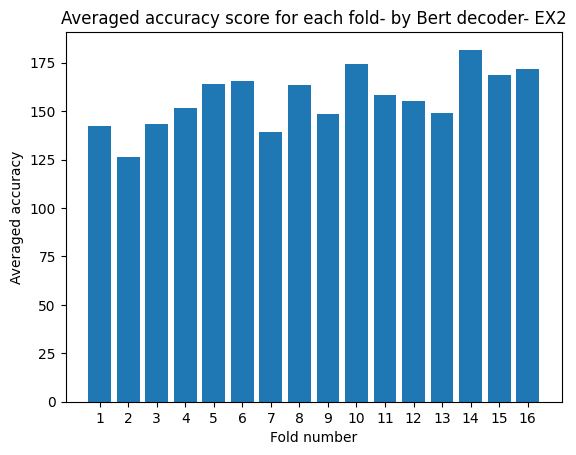

In [66]:
import matplotlib.pyplot as plt

plt.bar(range(1,17),avg_acc_score_byBert)
plt.title("Averaged accuracy score for each fold- by Bert decoder- EX2")
plt.xlabel("Fold number")
plt.ylabel("Averaged accuracy")
plt.xticks(range(1,17))
plt.show()

In [67]:
foldsize = 24
num_concepts = 384
accuracy_scores_byTrainedGlove2  = np.zeros((16,24))
word_score = dict()

def calc_cosine(predicted_test,train_vec,test_vec,true_test):
  all_cosines = dict()
  for vec in train_vec:
    all_cosines[str(vec)] = cosine_similarity(predicted_test,vec)
  for vec in test_vec:
    all_cosines[str(vec)] = cosine_similarity(predicted_test,vec)

  sort_dict = dict(sorted(all_cosines.items(), key=lambda item: item[1], reverse = True))
  location=1
  for key in sort_dict.keys():
    if key == str(true_test):
      return location
    else:
      location +=1
  return location


for i in range(0,16):
  test_index = range(i*foldsize,(i+1)*foldsize)
  all = set(range(384))
  train_index = list(all-set(test_index))
  train = data2[train_index, :]
  test = data2[test_index, :]

  #use the vectors:
  train_vec = vectors2[train_index, :]
  test_vec = vectors2[test_index, :]

  #use the concepts:
  train_con = concepts2[train_index]
  test_con = concepts2[test_index]

  decoder_model= learn_decoder(train,train_vec)

  for j in range(0,24):
    predicted_test = np.dot(test[j],decoder_model)
    true_test = test_vec[j]
    final_rank_byTrainedGlove2 = calc_cosine(predicted_test,train_vec,test_vec,true_test)
    accuracy_scores_byTrainedGlove2 [i,j]= final_rank_byTrainedGlove2
    current_word = test_con[j]
    word_score[current_word]= final_rank_byTrainedGlove2


In [68]:
accuracy_scores_byTrainedGlove2.shape
avg_acc_score_byTrainedGlove2=[]
for i in range(0,16):
  avg_acc_score_byTrainedGlove2.append(np.mean(accuracy_scores_byTrainedGlove2[i]))

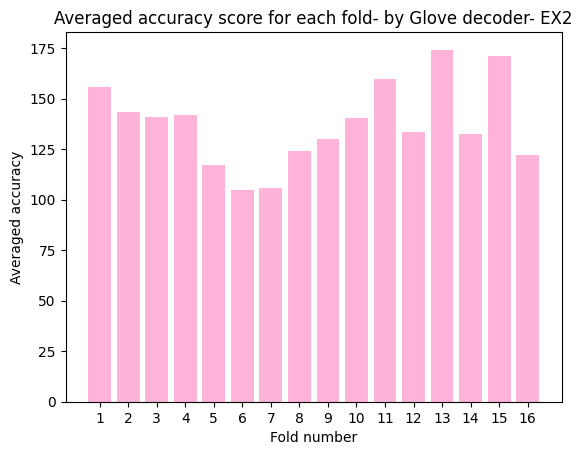

In [69]:
import matplotlib.pyplot as plt
plt.bar(range(1,17),avg_acc_score_byTrainedGlove2,color='hotpink',alpha=0.5)
plt.title("Averaged accuracy score for each fold- by Glove decoder- EX2")
plt.xlabel("Fold number")
plt.ylabel("Averaged accuracy")
plt.xticks(range(1,17))
plt.show()

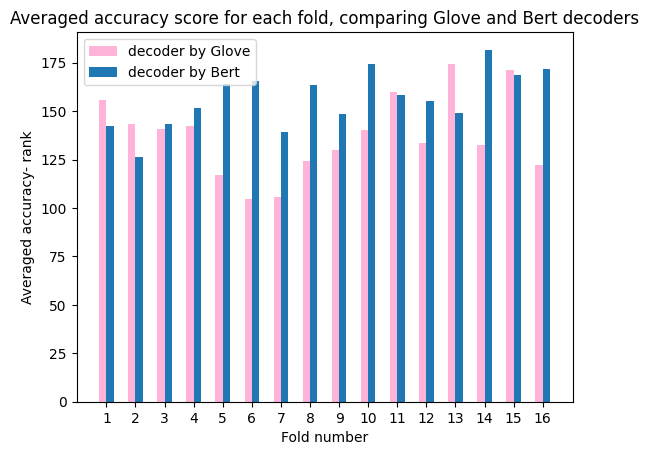

In [70]:
plt.bar(np.arange(1,17),avg_acc_score_byTrainedGlove2,0.25,label = 'decoder by Glove',color='hotpink',alpha=0.5)
plt.bar(np.arange(1,17)+0.25,avg_acc_score_byBert,0.25, label = 'decoder by Bert')
plt.title("Averaged accuracy score for each fold, comparing Glove and Bert decoders")
plt.xlabel("Fold number")
plt.ylabel("Averaged accuracy- rank")
plt.xticks(np.arange(1,17) + 0.25 / 2,np.arange(1,17))
plt.legend()
plt.show()

**When comparing both methods, we can see that the results of the average rank we got for each fold are lower for the glove (except for a few folds). This means that the results of the Glove are better since a low rank means better results on the data.**

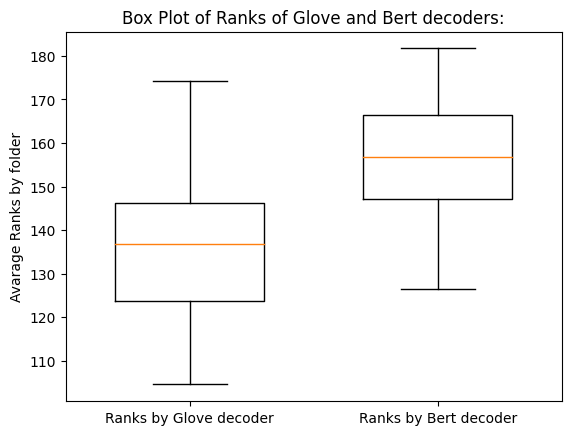

In [71]:
fig, ax = plt.subplots()
ax.boxplot(avg_acc_score_byTrainedGlove2, positions=[1], widths=0.6)
ax.boxplot(avg_acc_score_byBert, positions=[2], widths=0.6)

ax.set_xticklabels(['Ranks by Glove decoder', 'Ranks by Bert decoder'])

ax.set_ylabel('Avarage Ranks by folder')

ax.set_title('Box Plot of Ranks of Glove and Bert decoders:')

# Display the plot
plt.show()

**When comparing the boxplots of the Glove decoder and the Bert, we can clearly see that the Glove's averaged ranks are lower than the Bert by identiying that the 75Th percentile of the ranks of Glove is lower than the 25Th percentile of the ranks of Bert. That means that the Glove decoder is significantly better than the Bert on this task.**


### **Build a brain-encoder model:**

In [72]:
data2.shape

(384, 185866)

In [73]:
vectors2.shape

(384, 300)

**Using the original vector representations from the paper:**

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

num_voxels = 185866
#data2= The fMRI data organized in a matrix contains 384 rows (each row= a sentence)
#and 185866 columns (each column = a different voxel).
neural_signals_train = data2
#data3= The fMRI data organized in a matrix contains 234 rows (each row= a sentence)
#and 185866 columns (each column = a different voxel).
neural_signals_test = data3


# fit the linear regression model for each voxel- the X is the given vectors (representing the
# sentences, while the y is the prediction of the fMRI data (using the vectors).
model = LinearRegression()
model.fit(vectors2,neural_signals_train)

#predict
predictions = model.predict(vectors3)

# Calculatation of R2 score- by voxel
r2_scores = r2_score(neural_signals_test, predictions,multioutput='raw_values')

In [75]:
r2_scores.shape

(185866,)

In [76]:
predictions.shape

(243, 185866)

In [77]:
print(type(r2_scores))

<class 'numpy.ndarray'>


In [78]:
r2_list = list(r2_scores)

In [79]:
dict_r2 = {v: k for v, k in enumerate(r2_list)}
sort_dict_r2 = dict(sorted(dict_r2.items(), key=lambda item: item[1], reverse = True))

In [80]:
sort_dict_r2

{182332: -3.7907591702746046e-05,
 172387: -6.904237483529307e-05,
 177163: -9.887105677996999e-05,
 180848: -0.00015370704164596738,
 174907: -0.0003485657708657275,
 179141: -0.0005458137990979051,
 182349: -0.0005849286548826882,
 177171: -0.000662337792137091,
 179139: -0.0008640262562480405,
 177164: -0.0009369488328416775,
 172375: -0.00098070025447905,
 177172: -0.001032715971828857,
 172380: -0.0011361801292901763,
 177162: -0.0012053887511243033,
 177170: -0.0012743935821295516,
 179140: -0.0013753370711446777,
 179142: -0.0013916455371418834,
 177166: -0.00262001390445854,
 172381: -0.002991050414211438,
 180851: -0.004129587007666968,
 172376: -0.004528062591025783,
 179138: -0.004805171622971782,
 180850: -0.006581144501331515,
 174915: -0.007963924280322665,
 172382: -0.007981488038768969,
 174914: -0.00810432550415241,
 169664: -0.008609054523124993,
 169660: -0.00876248881030306,
 174926: -0.009213441300337522,
 177165: -0.009243889587052356,
 174901: -0.0102553461847769

In [81]:
#mean of the r2 scores:
np.mean(r2_list)

-5.19981441671015

In [82]:
#median of the r2 scores:
np.median(r2_list)

-4.917550646810665

In [83]:
#var of the r2 scores:
np.var(r2_list)

13.283083332276568

In [84]:
#min of the r2 scores:
np.min(r2_list)

-615.5875252005939

In [85]:
#max of the r2 scores:
np.max(r2_list)

-3.7907591702746046e-05

In [86]:
#treshold of -0.5 to 1:
best_r2 = [1 if value > -0.5 and value <= 1 else 0 for value in r2_scores]
#precentage of values in the treshold:
(sum(best_r2)/185866)*100

0.1371956140445267

In [87]:
#treshold of -1 to 1:
best_r2 = [1 if value >= -1 and value <= 1 else 0 for value in r2_scores]
#precentage of values in the treshold:
(sum(best_r2)/185866)*100

0.26793496389872273

We trained on the vectors384sentences, and the voxels of exp2, and tested on the vectors243sentences. We can see from the results of the R2 scores, that we got negative R2 scores. This means that the linear regression model is not performing well and is performing worse than the baseline- which is predicting the mean. In our opintion, this happened because the voxels in exp2 and exp3 are different, so we will try to perform CV on the data of EXP2- hoping to get better results.

In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
foldsize = 48
r2_scores_matrix = np.zeros((8,185866))
word_score = dict()
num_folds = 8
num_concept = 384


for i in range(0,num_folds):
  test_index = range(i*foldsize,(i+1)*foldsize)
  all = set(range(num_concept))
  train_index = list(all-set(test_index))
  train = data2[train_index, :]
  test = data2[test_index, :]

  #use the vectors:
  train_vec = vectors2[train_index, :]
  test_vec = vectors2[test_index, :]

  model = LinearRegression()
  model.fit(train_vec,train)

  #predict
  predictions = model.predict(test_vec)

  # Calculatation of R2 score- by voxel
  r2_scores = r2_score(test, predictions,multioutput='raw_values')
  r2_scores_matrix[i] = r2_scores

In [89]:
r2_scores_matrix[1]

array([-11.5388934 , -11.24749157,  -9.46570233, ..., -12.36038469,
       -12.18987043,  -9.30595863])

In [90]:
acc = np.mean(r2_scores_matrix,axis=0)

In [91]:
acc.shape

(185866,)

In [92]:
acc_list = list(acc)

In [93]:
dict_r2_acc = {v: k for v, k in enumerate(acc_list)}
sort_dict_r2_acc = dict(sorted(dict_r2_acc.items(), key=lambda item: item[1], reverse = True))

In [94]:
#mean of the r2 scores:
print(np.mean(acc_list))
#median of the r2 scores:
print(np.median(acc_list))
#var of the r2 scores:
print(np.var(acc_list))
#min of the r2 scores:
print(np.min(acc_list))
#min of the r2 scores:
print(np.max(acc_list))

-12.785250622208972
-12.58951714079922
8.709639173007389
-304.55926763491175
1.0


In [95]:
#treshold of -0.5 to 1:
best_acc = [1 if value > -0.5 and value <= 1 else 0 for value in acc_list]
#precentage of values in the treshold:
(sum(best_acc)/185866)*100

0.07101890609363735

In [96]:
#treshold of -1 to 1:
best_acc1 = [1 if value >= -1 and value <= 1 else 0 for value in acc_list]
#precentage of values in the treshold:
(sum(best_acc1)/185866)*100

0.07101890609363735

In [97]:
acc_list

[-11.383871671500819,
 -11.120030713812481,
 -11.285621289438465,
 -10.592181160526438,
 -14.19999609367246,
 -12.166614658146168,
 -11.566014362506653,
 -11.591003056816195,
 -11.29874811965465,
 -12.100371027334763,
 -13.60666225665803,
 -15.86058911160805,
 -15.216234372829298,
 -14.192238685956683,
 -12.378958299065518,
 -11.95627068837011,
 -12.870409572683842,
 -10.47294489581922,
 -15.444020867766884,
 -12.091343433086536,
 -15.01938784193862,
 -17.929922700513554,
 -16.400593500310954,
 -14.822494476141905,
 -14.980347601145972,
 -16.57848734163278,
 -10.38677785414774,
 -11.250807771201883,
 -13.971529936650441,
 -15.057456508115443,
 -13.831841519383126,
 -13.986730920960717,
 -13.260762602302421,
 -12.394964455771257,
 -9.905009202208548,
 -11.525529655017113,
 -14.251690262290918,
 -16.59642170397264,
 -16.08414971928547,
 -15.43780447960231,
 -13.873496318710426,
 -10.257435331216431,
 -7.156776864946405,
 -13.778017983459922,
 -16.519062274834262,
 -15.519046391226425,
 -

In [98]:
data2.shape

(384, 185866)

In [99]:
import numpy as np
import torch
vectors_bert_exp3 = np.zeros((243,768))
for i,concept in enumerate(concepts3):
  tokens = tokenizer.encode(concept, add_special_tokens=False)
  input_ids = torch.tensor([tokens])
  with torch.no_grad():
    outputs = model_bert(input_ids)
    embeded_vec = outputs.last_hidden_state
    embeded_vec = embeded_vec[0]
    if embeded_vec.shape == (1,768):
      vectors_bert_exp3[i] = embeded_vec
    else:
      mean_vec= torch.mean(embeded_vec,axis=0)
      vectors_bert_exp3[i] =mean_vec
    if vectors_bert_exp3[i] == torch.zeros((768,)):
      print("hi")
vectors_bert_exp3

array([[-0.11740609,  0.43681261, -0.0597941 , ..., -1.00164831,
         0.1696279 ,  0.01291495],
       [-0.06757115,  0.44627443, -0.1536552 , ..., -0.22591846,
        -0.11134027,  0.39920262],
       [ 0.15385433, -0.06441248,  0.36088076, ..., -0.26576379,
         0.18303876,  0.37371618],
       ...,
       [ 0.02489707,  0.15294881,  0.42034665, ..., -0.13120298,
        -0.32199162,  0.59290493],
       [ 0.21330458,  0.38977605,  0.47933277, ..., -0.28395337,
         0.21024595,  0.72257572],
       [-0.16174905,  0.15464407,  0.23984769, ...,  0.24859357,
         0.14478345,  0.71142322]])

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

num_voxels = 185866
#data2= The fMRI data organized in a matrix contains 384 rows (each row= a sentence)
#and 185866 columns (each column = a different voxel).
neural_signals_train = data2
#data3= The fMRI data organized in a matrix contains 234 rows (each row= a sentence)
#and 185866 columns (each column = a different voxel).
neural_signals_test = data3


# fit the linear regression model for each voxel- the X is the given vectors (representing the
# sentences, while the y is the prediction of the fMRI data (using the vectors).
model = LinearRegression()
model.fit(vectors_bert,neural_signals_train)

#predict
predictions = model.predict(vectors_bert_exp3)

# Calculatation of R2 score- by voxel
r2_scores_bert = r2_score(neural_signals_test, predictions,multioutput='raw_values')

In [101]:
r2_scores_bert.shape

(185866,)

In [102]:
r2_list_bert = list(r2_scores_bert)
dict_r2 = {v: k for v, k in enumerate(r2_list_bert)}
sort_dict_r2_list_bert = dict(sorted(dict_r2.items(), key=lambda item: item[1], reverse = True))

In [103]:
#mean of the r2 scores:
print(np.mean(r2_list_bert))
#median of the r2 scores:
print(np.median(r2_list_bert))
#var of the r2 scores:
print(np.var(r2_list_bert))
#min of the r2 scores:
print(np.min(r2_list_bert))
#min of the r2 scores:
print(np.max(r2_list_bert))

-3.1945839142558117
-3.0365679956934972
5.879355018155122
-379.96718334677576
0.03407138696899703


In [104]:
#treshold of -0.5 to 1:
best_r2_bert = [1 if value > -0.5 and value <= 1 else 0 for value in r2_list_bert]
#precentage of values in the treshold:
(sum(best_r2_bert)/185866)*100

0.22596924666157342

In [105]:
#treshold of -1 to 1:
best_r2_bert1 = [1 if value >= -1 and value <= 1 else 0 for value in r2_list_bert]
#precentage of values in the treshold:
(sum(best_r2_bert1)/185866)*100

0.5692272927808206

In [106]:
sort_dict_r2_list_bert

{174918: 0.03407138696899703,
 174919: 0.021198304438249882,
 174917: 0.011040844981627718,
 174920: 0.009898970309184296,
 182332: -3.7907591702746046e-05,
 172387: -6.904237483529307e-05,
 177163: -9.887105677996999e-05,
 180848: -0.00015370704164596738,
 174907: -0.0003485657708657275,
 179141: -0.0005458137990979051,
 182349: -0.0005849286548826882,
 177171: -0.000662337792137091,
 179139: -0.0008640262562480405,
 177164: -0.0009369488328416775,
 172375: -0.00098070025447905,
 177172: -0.001032715971828857,
 172380: -0.0011361801292901763,
 177162: -0.0012053887511243033,
 177170: -0.0012743935821295516,
 179140: -0.0013753370711446777,
 179142: -0.0013916455371418834,
 177166: -0.00262001390445854,
 172381: -0.002991050414211438,
 180851: -0.004129587007666968,
 172376: -0.004528062591025783,
 179138: -0.004805171622971782,
 180850: -0.006581144501331515,
 174915: -0.007963924280322665,
 172382: -0.007981488038768969,
 174914: -0.00810432550415241,
 169664: -0.008609054523124993,


In [107]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
foldsize = 48
r2_scores_matrix_bert = np.zeros((8,185866))
word_score = dict()
num_folds = 8
num_concept = 384


for i in range(0,num_folds):
  test_index = range(i*foldsize,(i+1)*foldsize)
  all = set(range(num_concept))
  train_index = list(all-set(test_index))
  train = data2[train_index, :]
  test = data2[test_index, :]

  #use the vectors:
  train_vec = vectors_bert[train_index, :]
  test_vec = vectors_bert[test_index, :]

  model = LinearRegression()
  model.fit(train_vec,train)

  #predict
  predictions = model.predict(test_vec)

  # Calculatation of R2 score- by voxel
  r2_scores = r2_score(test, predictions,multioutput='raw_values')
  r2_scores_matrix_bert[i] = r2_scores

In [108]:
r2_scores_matrix_bert

array([[-4.68449143, -4.68366826, -4.4583422 , ..., -3.12791116,
        -2.73212501, -2.73203539],
       [-3.54195862, -3.519115  , -3.50651457, ..., -3.09368266,
        -2.53684283, -2.5835377 ],
       [-1.91007319, -2.15165632, -2.07675258, ..., -2.01733861,
        -2.60595059, -3.2639408 ],
       ...,
       [-2.31779973, -2.6339663 , -1.86875562, ..., -2.15097959,
        -2.47549816, -2.57289772],
       [-4.04592284, -4.96846152, -3.92435097, ..., -0.98745342,
        -1.42404081, -1.48486901],
       [-2.03089067, -2.24791346, -2.96032399, ..., -2.0831556 ,
        -3.68011427, -3.66881908]])

In [109]:
r2_scores_matrix_bert.shape

(8, 185866)

In [110]:
acc_r2_bert = np.mean(r2_scores_matrix_bert,axis=0)

In [111]:
acc_r2_bert.shape

(185866,)

In [112]:
acc_r2_bert_list = list(acc_r2_bert)

In [113]:
#mean of the r2 scores:
print(np.mean(acc_r2_bert_list))
#median of the r2 scores:
print(np.median(acc_r2_bert_list))
#var of the r2 scores:
print(np.var(acc_r2_bert_list))
#min of the r2 scores:
print(np.min(acc_r2_bert_list))
#min of the r2 scores:
print(np.max(acc_r2_bert_list))

-1.9851592704129628
-1.9624619445528175
0.26244229934472724
-45.214008324520435
1.0


In [114]:
#treshold of -0.5 to 1:
best_acc_r2_bert_list = [1 if value > -0.5 and value <= 1 else 0 for value in acc_r2_bert_list]
#precentage of values in the treshold:
(sum(best_acc_r2_bert_list)/185866)*100

0.08715956656946403

In [115]:
#treshold of -1 to 1:
best_acc_r2_bert_list1 = [1 if value >= -1 and value <= 1 else 0 for value in acc_r2_bert_list]
#precentage of values in the treshold:
(sum(best_acc_r2_bert_list1)/185866)*100

0.8011147816168638

In [116]:
dict_r2_acc_Bert = {v: k for v, k in enumerate(acc_r2_bert_list)}
sort_dict_r2_acc_Bert = dict(sorted(dict_r2_acc_Bert.items(), key=lambda item: item[1], reverse = True))

In [117]:
sort_dict_r2_acc_Bert

{169660: 1.0,
 169661: 1.0,
 169662: 1.0,
 169663: 1.0,
 169664: 1.0,
 169670: 1.0,
 169671: 1.0,
 169672: 1.0,
 169673: 1.0,
 169674: 1.0,
 169675: 1.0,
 169676: 1.0,
 172375: 1.0,
 172376: 1.0,
 172377: 1.0,
 172378: 1.0,
 172379: 1.0,
 172380: 1.0,
 172381: 1.0,
 172382: 1.0,
 172383: 1.0,
 172384: 1.0,
 172385: 1.0,
 172386: 1.0,
 172387: 1.0,
 172388: 1.0,
 172389: 1.0,
 172390: 1.0,
 172391: 1.0,
 174901: 1.0,
 174902: 1.0,
 174903: 1.0,
 174904: 1.0,
 174905: 1.0,
 174906: 1.0,
 174907: 1.0,
 174908: 1.0,
 174909: 1.0,
 174910: 1.0,
 174911: 1.0,
 174912: 1.0,
 174913: 1.0,
 174914: 1.0,
 174915: 1.0,
 174924: 1.0,
 174925: 1.0,
 174926: 1.0,
 174927: 1.0,
 174928: 1.0,
 174929: 1.0,
 177162: 1.0,
 177163: 1.0,
 177164: 1.0,
 177165: 1.0,
 177166: 1.0,
 177167: 1.0,
 177168: 1.0,
 177169: 1.0,
 177170: 1.0,
 177171: 1.0,
 177172: 1.0,
 177173: 1.0,
 177174: 1.0,
 177175: 1.0,
 177176: 1.0,
 177177: 1.0,
 177178: 1.0,
 177179: 1.0,
 177180: 1.0,
 177181: 1.0,
 177182: 1.0,
 17718

### **Open-ended Tasks**

In [118]:
list_of_range =[]
for i,sen in enumerate(keySentences2):
  list= sen[0].item().split(" ")
  list_of_range.append(len(list))

In [119]:
dict_of_ranges = dict()
for range in list_of_range:
  if range not in dict_of_ranges.keys():
    dict_of_ranges[range] = 1
  else:
     dict_of_ranges[range] += 1

In [120]:
dict_of_ranges

{10: 53,
 11: 72,
 12: 77,
 16: 11,
 9: 36,
 13: 54,
 15: 23,
 17: 7,
 14: 36,
 8: 10,
 7: 4,
 19: 1}

In [121]:
for i,range in enumerate(list_of_range):
  if range == 19:
    list_of_range[i] = 17
  elif range == 7:
    list_of_range[i] = 8

In [122]:
dict_of_ranges = dict()
for range in list_of_range:
  if range not in dict_of_ranges.keys():
    dict_of_ranges[range] = 1
  else:
     dict_of_ranges[range] += 1

In [123]:
dict_of_ranges

{10: 53, 11: 72, 12: 77, 16: 11, 9: 36, 13: 54, 15: 23, 17: 8, 14: 36, 8: 14}

Evaluate by Glove:

In [124]:
glove_scores = accuracy_scores_byTrainedGlove2.reshape(384,1)

In [125]:
dict_of_ranges_score_glove = dict()
for i,rank in enumerate(glove_scores):
  range = list_of_range[i]
  if str(range) not in dict_of_ranges_score_glove.keys():
    dict_of_ranges_score_glove[str(range)]= [rank]
  else:
    dict_of_ranges_score_glove[str(range)].append(rank)

In [126]:
dict_of_ranges_score_avg_rank_glove = dict()
for key,value in dict_of_ranges_score_glove.items():
  dict_of_ranges_score_avg_rank_glove[key] = np.mean(value)
sort_dict_of_ranges_score_avg_rank_glove = dict(sorted(dict_of_ranges_score_avg_rank_glove.items(), key=lambda item: item[1], reverse = False))

In [127]:
sort_dict_of_ranges_score_avg_rank_glove

{'17': 73.375,
 '15': 81.08695652173913,
 '13': 106.5,
 '16': 129.27272727272728,
 '14': 129.52777777777777,
 '11': 131.97222222222223,
 '12': 132.75324675324674,
 '10': 161.64150943396226,
 '9': 197.08333333333334,
 '8': 218.5}

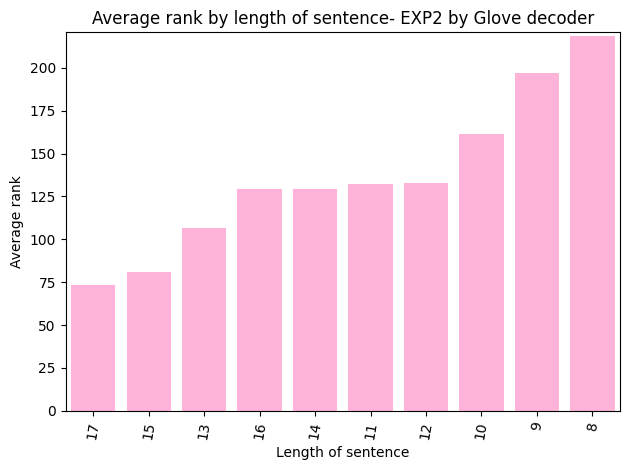

<Figure size 7000x1500 with 0 Axes>

In [128]:
import matplotlib.pyplot as plt
plt.bar(sort_dict_of_ranges_score_avg_rank_glove.keys(),sort_dict_of_ranges_score_avg_rank_glove.values(),color='hotpink',alpha=0.5)
plt.xticks(rotation = 80 , size = 10)
plt.title("Average rank by length of sentence- EXP2 by Glove decoder")
plt.xlabel("Length of sentence")
plt.ylabel("Average rank")
plt.margins(0.01)
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

Evaluate by Bert:

In [129]:
bert_scores = accuracy_scores_byBert.reshape(384,1)

In [130]:
dict_of_ranges_score_bert = dict()
for i,rank in enumerate(bert_scores):
  range = list_of_range[i]
  if str(range) not in dict_of_ranges_score_bert.keys():
    dict_of_ranges_score_bert[str(range)]= [rank]
  else:
    dict_of_ranges_score_bert[str(range)].append(rank)

In [131]:
dict_of_ranges_score_avg_rank_bert = dict()
for key,value in dict_of_ranges_score_bert.items():
  dict_of_ranges_score_avg_rank_bert[key] = np.mean(value)
sort_dict_of_ranges_score_avg_rank_bert = dict(sorted(dict_of_ranges_score_avg_rank_bert.items(), key=lambda item: item[1], reverse = False))

In [132]:
sort_dict_of_ranges_score_avg_rank_bert

{'17': 124.5,
 '12': 142.64935064935065,
 '15': 143.08695652173913,
 '14': 150.86111111111111,
 '10': 154.58490566037736,
 '13': 159.46296296296296,
 '11': 164.83333333333334,
 '8': 171.5,
 '9': 174.94444444444446,
 '16': 183.0909090909091}

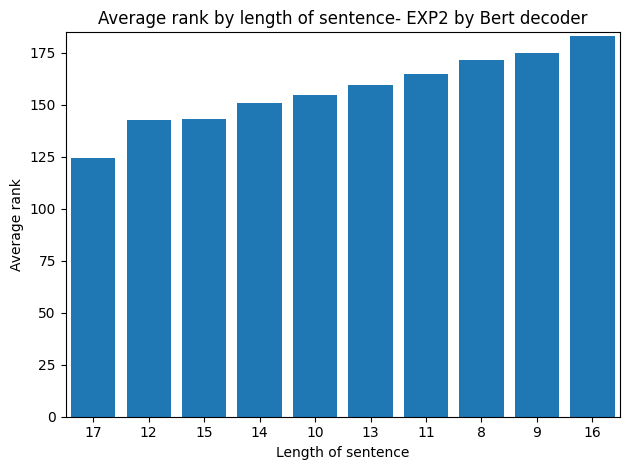

<Figure size 7000x1500 with 0 Axes>

In [133]:
import matplotlib.pyplot as plt
plt.bar(sort_dict_of_ranges_score_avg_rank_bert.keys(),sort_dict_of_ranges_score_avg_rank_bert.values())
plt.xticks( size = 10)
plt.title("Average rank by length of sentence- EXP2 by Bert decoder")
plt.xlabel("Length of sentence")
plt.ylabel("Average rank")
plt.margins(0.01)
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

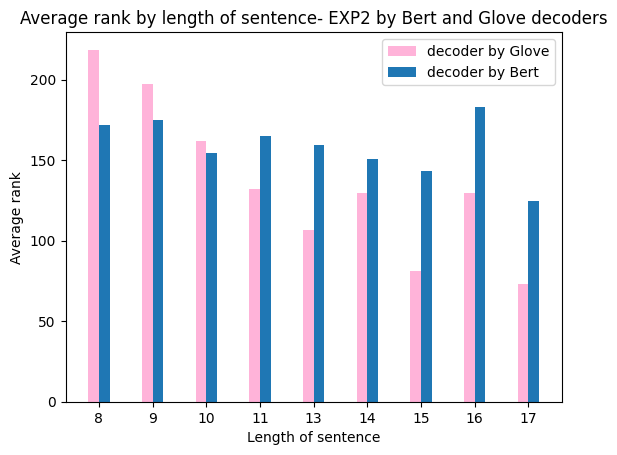

In [134]:
all_lengths1 = ('8','9','10','11','13','14','15','16','17')
all_lengths = [8,9,10,11,13,14,15,16,17]
glove_values = []
bert_values = []
for lengths in all_lengths :
  glove_values.append(dict_of_ranges_score_avg_rank_glove[str(lengths)])
  bert_values.append(dict_of_ranges_score_avg_rank_bert[str(lengths)])

ind = np.arange(9)
w=0.2
plt.bar(ind,glove_values,0.2,label = 'decoder by Glove',color="hotpink",alpha=0.5)
plt.bar(ind+w,bert_values,0.2, label = 'decoder by Bert')
plt.title("Average rank by length of sentence- EXP2 by Bert and Glove decoders")
plt.xlabel("Length of sentence")
plt.ylabel("Average rank")
plt.xticks(ind + w / 2, all_lengths1)
plt.legend()
plt.show()

**By length of distinct words:**



In [135]:
import nltk
from nltk.corpus import stopwords
import string
import re

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
  tokens = nltk.word_tokenize(text.lower())
  tokens = [token for token in tokens if token not in string.punctuation]
  tokens = [token for token in tokens if token not in stop_words]
  return tokens


In [137]:
list_of_distinct_words_range =[]
for i,sen in enumerate(keySentences2):
  list= sen[0].item()
  new_list= preprocess(list)
  list_of_distinct_words_range.append(len(new_list))

In [138]:
dict_of_distinct_ranges = dict()
for range in list_of_distinct_words_range:
  if range not in dict_of_distinct_ranges.keys():
    dict_of_distinct_ranges[range] = 1
  else:
     dict_of_distinct_ranges[range] += 1

In [139]:
dict_of_distinct_ranges

{6: 123, 7: 111, 5: 46, 8: 67, 9: 24, 4: 8, 10: 5}

In [140]:
for i,range in enumerate(list_of_distinct_words_range):
  if range == 10:
    list_of_distinct_words_range[i] = 9
  elif range == 4:
    list_of_distinct_words_range[i] = 5

In [141]:
dict_of_distinct_ranges = dict()
for range in list_of_distinct_words_range:
  if range not in dict_of_distinct_ranges.keys():
    dict_of_distinct_ranges[range] = 1
  else:
     dict_of_distinct_ranges[range] += 1

In [142]:
dict_of_distinct_ranges

{6: 123, 7: 111, 5: 54, 8: 67, 9: 29}

Evaluate by Glove:

In [143]:
dict_of_ranges_score_distinct_glove = dict()
for i,rank in enumerate(glove_scores):
  range = list_of_distinct_words_range[i]
  if str(range) not in dict_of_ranges_score_distinct_glove.keys():
    dict_of_ranges_score_distinct_glove[str(range)]= [rank]
  else:
    dict_of_ranges_score_distinct_glove[str(range)].append(rank)

In [144]:
dict_of_ranges_score_avg_rank_distinct_glove = dict()
for key,value in dict_of_ranges_score_distinct_glove.items():
  dict_of_ranges_score_avg_rank_distinct_glove[key] = np.mean(value)
sort_ranges_avg_rank_distinct_glove = dict(sorted(dict_of_ranges_score_avg_rank_distinct_glove.items(), key=lambda item: item[1], reverse = False))

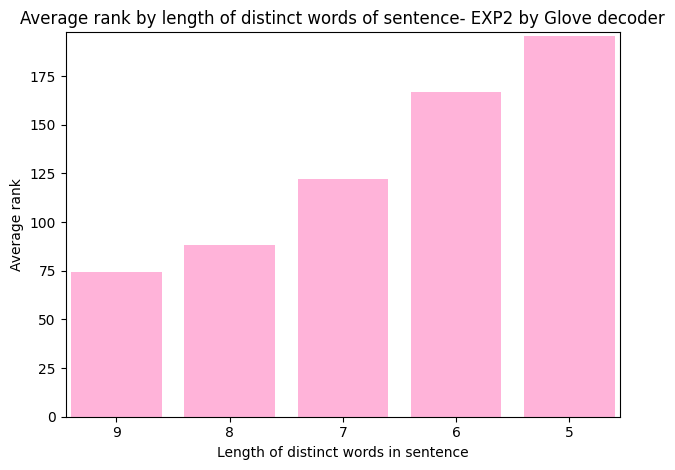

<Figure size 7000x1500 with 0 Axes>

In [145]:
import matplotlib.pyplot as plt
plt.bar(sort_ranges_avg_rank_distinct_glove.keys(),sort_ranges_avg_rank_distinct_glove.values(),color='hotpink',alpha=0.5)
plt.xticks(size = 10)
plt.title("Average rank by length of distinct words of sentence- EXP2 by Glove decoder")
plt.xlabel("Length of distinct words in sentence")
plt.ylabel("Average rank")
plt.margins(0.01)
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

Evaluate by Bert:

In [146]:
dict_of_ranges_score_distinct_bert = dict()
for i,rank in enumerate(bert_scores):
  range = list_of_distinct_words_range[i]
  if str(range) not in dict_of_ranges_score_distinct_bert.keys():
    dict_of_ranges_score_distinct_bert[str(range)]= [rank]
  else:
    dict_of_ranges_score_distinct_bert[str(range)].append(rank)

In [147]:
dict_of_ranges_score_avg_rank_distinct_bert = dict()
for key,value in dict_of_ranges_score_distinct_bert.items():
  dict_of_ranges_score_avg_rank_distinct_bert[key] = np.mean(value)
sort_dict_of_ranges_score_avg_rank_distinct_bert = dict(sorted(dict_of_ranges_score_avg_rank_distinct_bert.items(), key=lambda item: item[1], reverse = False))

In [148]:
sort_dict_of_ranges_score_avg_rank_distinct_bert

{'6': 147.02439024390245,
 '5': 147.4814814814815,
 '7': 156.6936936936937,
 '9': 168.89655172413794,
 '8': 175.34328358208955}

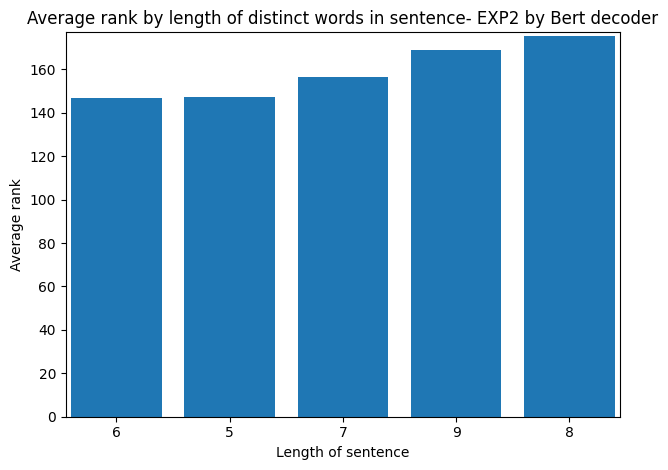

<Figure size 7000x1500 with 0 Axes>

In [149]:
import matplotlib.pyplot as plt
plt.bar(sort_dict_of_ranges_score_avg_rank_distinct_bert.keys(),sort_dict_of_ranges_score_avg_rank_distinct_bert.values())
plt.xticks( size = 10)
plt.title("Average rank by length of distinct words in sentence- EXP2 by Bert decoder")
plt.xlabel("Length of sentence")
plt.ylabel("Average rank")
plt.margins(0.01)
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

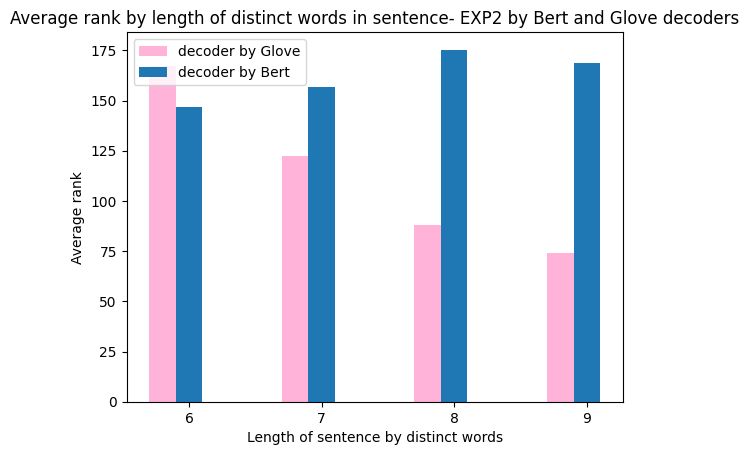

In [150]:
all_lengths = np.arange(6,10)
all_lengths1 =  np.arange(6,10) + 0.2
glove_values = []
bert_values = []
for lengths in all_lengths :
  glove_values.append(dict_of_ranges_score_avg_rank_distinct_glove[str(lengths)])
  bert_values.append(dict_of_ranges_score_avg_rank_distinct_bert[str(lengths)])

plt.bar(all_lengths,glove_values,0.2,label = 'decoder by Glove',color="hotpink",alpha=0.5)
plt.bar(all_lengths1,bert_values,0.2, label = 'decoder by Bert')
plt.title("Average rank by length of distinct words in sentence- EXP2 by Bert and Glove decoders")
plt.xlabel("Length of sentence by distinct words")
plt.ylabel("Average rank")
plt.xticks(all_lengths1,all_lengths)
plt.legend()
plt.show()

**By performing sentiment analysis on the topics of each sentence:**


In [151]:
from textblob import TextBlob
dict_of_sentiment = dict()

# Function to perform sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [152]:
analyze_sentiment_score =[]
for i,sen in enumerate(keySentences2):
  text= sen[0].item()
  sentiment = analyze_sentiment(text)
  analyze_sentiment_score.append(sentiment)

In [153]:
dict_of_sentiment = dict()
for sentiment in analyze_sentiment_score:
  if sentiment not in dict_of_sentiment.keys():
    dict_of_sentiment[sentiment] = 1
  else:
     dict_of_sentiment[sentiment] += 1

In [154]:
dict_of_sentiment

{'Neutral': 182, 'Negative': 91, 'Positive': 111}

In [155]:
dict_of_sentiment_glove = dict()
for i,rank in enumerate(glove_scores):
  sentiment = analyze_sentiment_score[i]
  if sentiment not in dict_of_sentiment_glove.keys():
    dict_of_sentiment_glove[sentiment]= [rank]
  else:
    dict_of_sentiment_glove[sentiment].append(rank)

In [156]:
dict_of_sentiment_avg_rank_glove = dict()
for key,value in dict_of_sentiment_glove.items():
  dict_of_sentiment_avg_rank_glove[key] = np.mean(value)
sort_dict_of_sentiment_avg_rank_glove = dict(sorted(dict_of_sentiment_avg_rank_glove.items(), key=lambda item: item[1], reverse = False))

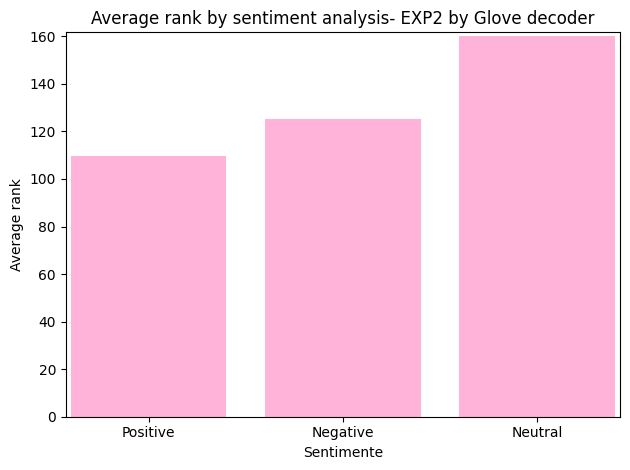

<Figure size 7000x1500 with 0 Axes>

In [157]:
import matplotlib.pyplot as plt
plt.bar(sort_dict_of_sentiment_avg_rank_glove.keys(),sort_dict_of_sentiment_avg_rank_glove.values(),color='hotpink',alpha=0.5)
plt.xticks(size = 10)
plt.title("Average rank by sentiment analysis- EXP2 by Glove decoder")
plt.xlabel("Sentimente")
plt.ylabel("Average rank")
plt.margins(0.01)
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

Evaluate by Bert:

In [158]:
dict_of_sentiment_bert = dict()
for i,rank in enumerate(bert_scores):
  sentiment = analyze_sentiment_score[i]
  if sentiment not in dict_of_sentiment_bert.keys():
    dict_of_sentiment_bert[sentiment]= [rank]
  else:
    dict_of_sentiment_bert[sentiment].append(rank)

In [159]:
dict_of_sentiment_avg_rank_bert = dict()
for key,value in dict_of_sentiment_bert.items():
  dict_of_sentiment_avg_rank_bert[key] = np.mean(value)
sort_dict_of_sentiment_avg_rank_bert = dict(sorted(dict_of_sentiment_avg_rank_bert.items(), key=lambda item: item[1], reverse = False))

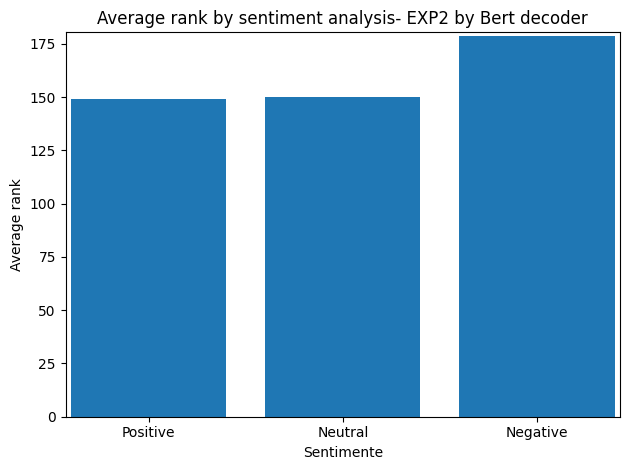

<Figure size 7000x1500 with 0 Axes>

In [160]:
import matplotlib.pyplot as plt
plt.bar(sort_dict_of_sentiment_avg_rank_bert.keys(),sort_dict_of_sentiment_avg_rank_bert.values())
plt.xticks(size = 10)
plt.title("Average rank by sentiment analysis- EXP2 by Bert decoder")
plt.xlabel("Sentimente")
plt.ylabel("Average rank")
plt.margins(0.01)
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

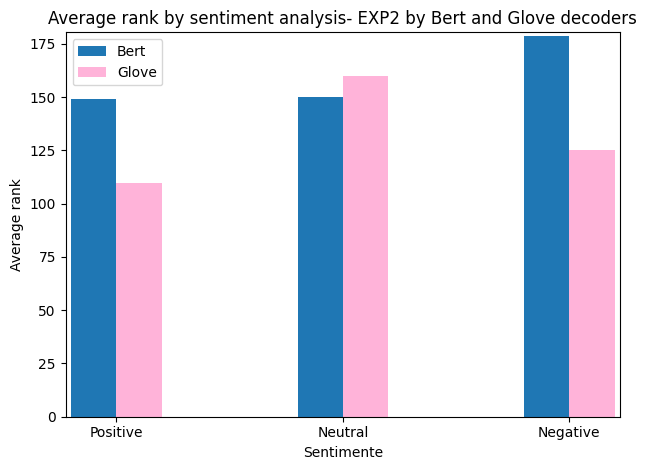

<Figure size 7000x1500 with 0 Axes>

In [161]:
import matplotlib.pyplot as plt
ind = np.arange(3)
plt.bar(ind,sort_dict_of_sentiment_avg_rank_bert.values(),0.2,label = 'Bert')
plt.bar(ind+0.2,[dict_of_sentiment_avg_rank_glove['Positive'],dict_of_sentiment_avg_rank_glove['Neutral'],dict_of_sentiment_avg_rank_glove['Negative']],0.2,color='hotpink',label = 'Glove',alpha=0.5)
plt.legend()
plt.xticks(size = 10)
plt.title("Average rank by sentiment analysis- EXP2 by Bert and Glove decoders")
plt.xlabel("Sentimente")
plt.ylabel("Average rank")
plt.margins(0.01)
plt.xticks(ind + 0.2 / 2, ('Positive', 'Neutral', 'Negative'))
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

In [162]:
vectors2

array([[ 0.366856, -0.31306 ,  0.028711, ..., -0.22306 ,  0.268278,
         0.199575],
       [ 0.39413 , -0.250356,  0.042328, ..., -0.286633,  0.096377,
        -0.053102],
       [-0.032598,  0.25447 ,  0.122252, ...,  0.033089, -0.003771,
         0.167761],
       ...,
       [ 0.12136 ,  0.442767, -0.130527, ...,  0.122083, -0.084372,
        -0.022405],
       [-0.234316,  0.185497, -0.164314, ..., -0.044942,  0.162396,
        -0.002788],
       [-0.16232 ,  0.284525, -0.19418 , ..., -0.074766,  0.098054,
         0.233641]])

In [163]:
vectors2.shape

(384, 300)

In [164]:
from sklearn.cluster import KMeans
import numpy as np
X_glove = vectors2
kmeans_glove = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_glove)
labels_by_glove = kmeans_glove.labels_

In [165]:
X_bert = vectors_bert
kmeans_bert = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_bert)
labels_by_bert = kmeans_bert.labels_

In [166]:
dict_of_clusters_bert = dict()
for i,rank in enumerate(bert_scores):
  label = str(labels_by_bert[i])
  if label not in dict_of_clusters_bert.keys():
    dict_of_clusters_bert[label]= [rank]
  else:
    dict_of_clusters_bert[label].append(rank)

In [167]:
dict_of_clusters_bert_avg = dict()
for key,value in dict_of_clusters_bert.items():
  dict_of_clusters_bert_avg[key] = np.mean(value)
sorted_dict_of_clusters_bert_avg = dict(sorted(dict_of_clusters_bert_avg.items(), key=lambda item: item[1], reverse = False))

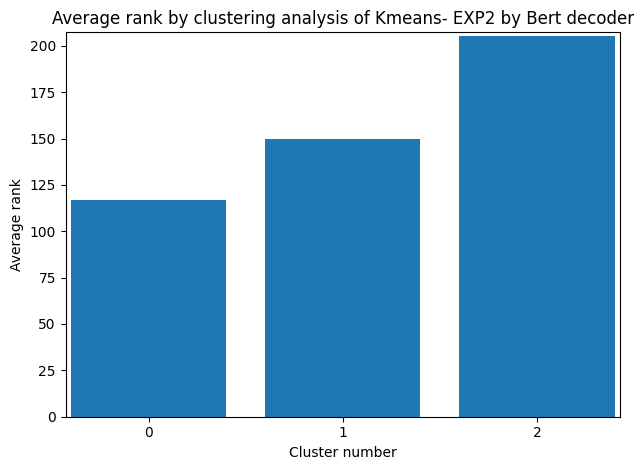

<Figure size 7000x1500 with 0 Axes>

In [168]:
import matplotlib.pyplot as plt
plt.bar(sorted_dict_of_clusters_bert_avg.keys(),sorted_dict_of_clusters_bert_avg.values())
plt.xticks(size = 10)
plt.title("Average rank by clustering analysis of Kmeans- EXP2 by Bert decoder")
plt.xlabel("Cluster number")
plt.ylabel("Average rank")
plt.margins(0.01)
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

In [169]:
counter0bert =0
counter1bert =0
counter2bert =0
for val in labels_by_bert:
  if val ==0:
    counter0bert +=1
  elif val ==1:
    counter1bert +=1
  else:
     counter2bert +=1

In [170]:
print(counter0bert)
print(counter1bert)
print(counter2bert)

163
77
144


In [171]:
counter0glove =0
counter1glove =0
counter2glove =0
for val in labels_by_glove:
  if val ==0:
    counter0glove +=1
  elif val ==1:
    counter1glove +=1
  else:
     counter2glove +=1

In [172]:
print(counter0glove)
print(counter1glove)
print(counter2glove)

95
57
232


In [173]:
keyPassageCategory2
keyPassages2
keySentences2 = pickle2['keySentences']
labelsPassageCategory2 = pickle2['labelsPassageCategory']
labelsPassageForEachSentence2 = pickle2['labelsPassageForEachSentence']
labelsSentences2 = pickle2['labelsSentences']


In [174]:
cluster0glove = []
cluster1glove =[]
cluster2glove =[]
for item, label in zip(labelsPassageCategory2,labels_by_glove):
  topic_id= item[0]-1
  topic_name = keyPassageCategory2[0][topic_id][0]
  print(topic_name)
  if label == 0:
    cluster0glove.append(topic_name)
  elif label == 1:
    cluster1glove.append(topic_name)
  else:
    cluster2glove.append(topic_name)

music
dwelling
fruit
crime
vehicles_transport
weapon
fruit
furniture
insect
vehicles_transport
profession
appliance
human
vegetable
insect
profession
animal
furniture
music
fish
drink_non_alcoholic
landscape
furniture
building_part
clothing
crime
disaster
bird
disaster
animal
body_part
place
body_part
disaster
building_part
body_part
landscape
kitchen_utensil
kitchen_utensil
human
clothing
tool
weapon
animal
place
dwelling
dwelling
kitchen_utensil
vegetable
vegetable
place
dwelling
human
drink_non_alcoholic
insect
landscape
body_part
kitchen_utensil
crime
drink_non_alcoholic
bird
fruit
music
fish
fruit
bird
appliance
weapon
fish
tool
profession
tool
tool
fish
vehicles_transport
clothing
profession
weapon
insect
landscape
clothing
furniture
appliance
crime
appliance
vegetable
vehicles_transport
place
disaster
music
bird
building_part
drink_non_alcoholic
animal
building_part
human


In [175]:
cluster0bert = []
cluster1bert =[]
cluster2bert =[]
for item, label in zip(labelsPassageCategory2,labels_by_bert):
  topic_id= item[0]-1
  topic_name = keyPassageCategory2[0][topic_id][0]
  print(topic_name)
  if label == 0:
    cluster0bert.append(topic_name)
  elif label == 1:
    cluster1bert.append(topic_name)
  else:
    cluster2bert.append(topic_name)

music
dwelling
fruit
crime
vehicles_transport
weapon
fruit
furniture
insect
vehicles_transport
profession
appliance
human
vegetable
insect
profession
animal
furniture
music
fish
drink_non_alcoholic
landscape
furniture
building_part
clothing
crime
disaster
bird
disaster
animal
body_part
place
body_part
disaster
building_part
body_part
landscape
kitchen_utensil
kitchen_utensil
human
clothing
tool
weapon
animal
place
dwelling
dwelling
kitchen_utensil
vegetable
vegetable
place
dwelling
human
drink_non_alcoholic
insect
landscape
body_part
kitchen_utensil
crime
drink_non_alcoholic
bird
fruit
music
fish
fruit
bird
appliance
weapon
fish
tool
profession
tool
tool
fish
vehicles_transport
clothing
profession
weapon
insect
landscape
clothing
furniture
appliance
crime
appliance
vegetable
vehicles_transport
place
disaster
music
bird
building_part
drink_non_alcoholic
animal
building_part
human


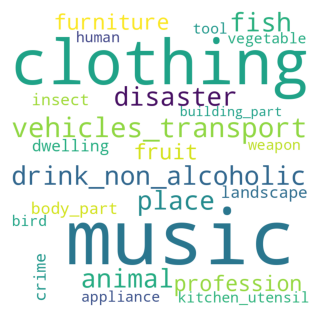

In [176]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

comment_words = ' '.join(cluster0bert)

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=5).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(3, 3), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

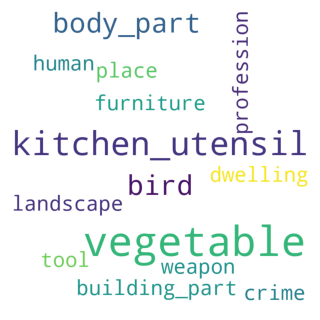

In [177]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

comment_words = ' '.join(cluster1bert)

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=5).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(3, 3), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

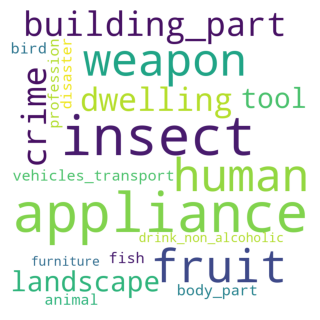

In [178]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

comment_words = ' '.join(cluster2bert)

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=5).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(3, 3), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

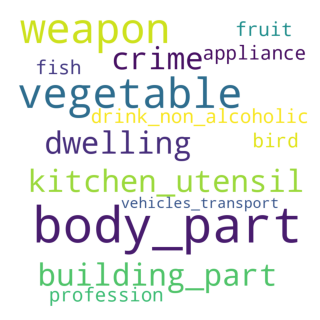

In [179]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

comment_words = ' '.join(cluster0glove)

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=5).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(3, 3), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

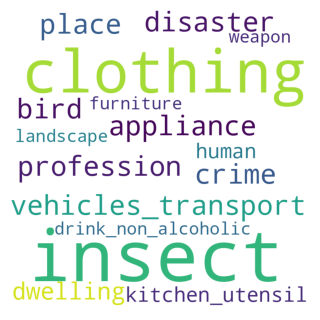

In [180]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

comment_words = ' '.join(cluster1glove)

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=5).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(3, 3), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

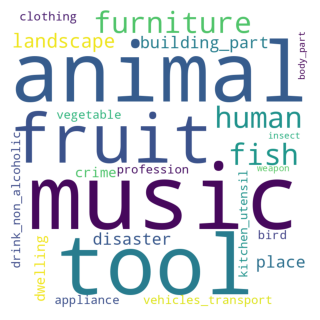

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

comment_words = ' '.join(cluster2glove)

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=5).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(3, 3), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [182]:
dict_of_clusters_glove = dict()
for i,rank in enumerate(glove_scores):
  label = str(labels_by_glove[i])
  if label not in dict_of_clusters_glove.keys():
    dict_of_clusters_glove[label]= [rank]
  else:
    dict_of_clusters_glove[label].append(rank)

In [183]:
dict_of_clusters_glove_avg = dict()
for key,value in dict_of_clusters_glove.items():
  dict_of_clusters_glove_avg[key] = np.mean(value)
sorted_dict_of_clusters_glove_avg = dict(sorted(dict_of_clusters_glove_avg.items(), key=lambda item: item[1], reverse = False))

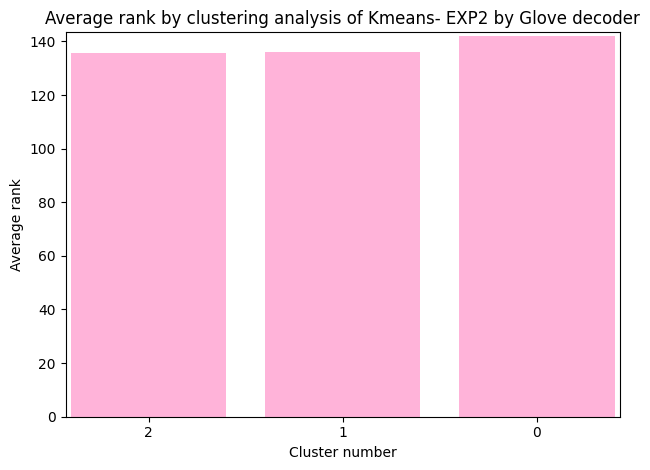

<Figure size 7000x1500 with 0 Axes>

In [184]:
import matplotlib.pyplot as plt
plt.bar(sorted_dict_of_clusters_glove_avg.keys(),sorted_dict_of_clusters_glove_avg.values(),color='hotpink',alpha=0.5)
plt.xticks(size = 10)
plt.title("Average rank by clustering analysis of Kmeans- EXP2 by Glove decoder")
plt.xlabel("Cluster number")
plt.ylabel("Average rank")
plt.margins(0.01)
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

In [185]:
dict_for_cluster_1_glove = {"Positive":0 , "Neutral" :0 , "Negative":0 }
dict_for_cluster_2_glove = {"Positive":0 , "Neutral" :0 , "Negative":0 }
dict_for_cluster_0_glove = {"Positive":0 , "Neutral" :0 , "Negative":0 }
dict_for_cluster_1_bert = {"Positive":0 , "Neutral" :0 , "Negative":0 }
dict_for_cluster_2_bert = {"Positive":0 , "Neutral" :0 , "Negative":0 }
dict_for_cluster_0_bert = {"Positive":0 , "Neutral" :0 , "Negative":0 }
for sentiment,label in zip(analyze_sentiment_score,labels_by_bert):
  if label == 1:
    dict_for_cluster_1_bert[sentiment] +=1
  elif label == 2:
    dict_for_cluster_2_bert[sentiment] +=1
  else:
    dict_for_cluster_0_bert[sentiment] +=1

for sentiment,label in zip(analyze_sentiment_score,labels_by_glove):
  if label == 1:
    dict_for_cluster_1_glove[sentiment] +=1
  elif label == 2:
    dict_for_cluster_2_glove[sentiment] +=1
  else:
    dict_for_cluster_0_glove[sentiment] +=1

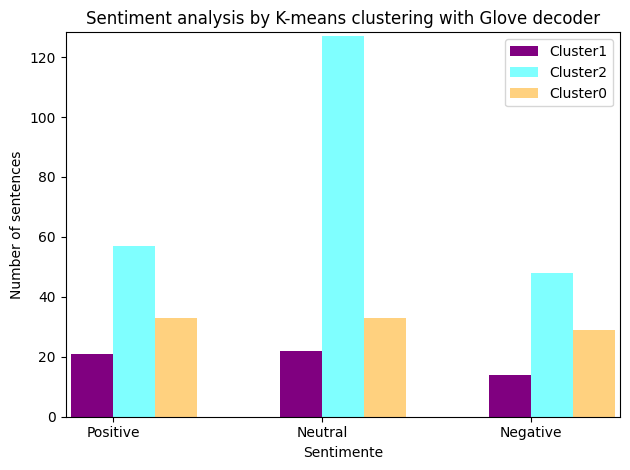

<Figure size 7000x1500 with 0 Axes>

In [186]:
import matplotlib.pyplot as plt
ind = np.arange(3)
plt.bar(ind,dict_for_cluster_1_glove.values(),0.2,label = 'Cluster1', color = 'purple')
plt.bar(ind+0.2,dict_for_cluster_2_glove.values(),0.2,color='cyan',label = 'Cluster2',alpha=0.5)
plt.bar(ind+0.4,dict_for_cluster_0_glove.values(),0.2,color='orange',label = 'Cluster0',alpha=0.5)
plt.legend()
plt.xticks(size = 10)
plt.title("Sentiment analysis by K-means clustering with Glove decoder")
plt.xlabel("Sentimente")
plt.ylabel("Number of sentences")
plt.margins(0.01)
plt.xticks(ind + 0.2 / 2, ('Positive', 'Neutral', 'Negative'))
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

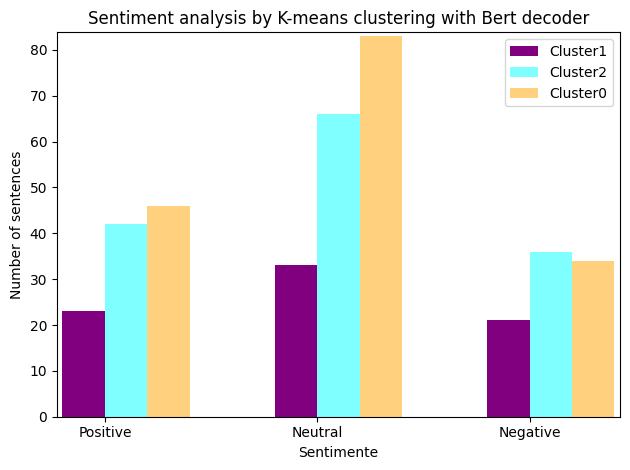

<Figure size 7000x1500 with 0 Axes>

In [187]:
import matplotlib.pyplot as plt
ind = np.arange(3)
plt.bar(ind,dict_for_cluster_1_bert.values(),0.2,label = 'Cluster1',color ='purple')
plt.bar(ind+0.2,dict_for_cluster_2_bert.values(),0.2,color='cyan',label = 'Cluster2',alpha=0.5)
plt.bar(ind+0.4,dict_for_cluster_0_bert.values(),0.2,color='orange',label = 'Cluster0',alpha=0.5)
plt.legend()
plt.xticks(size = 10)
plt.title("Sentiment analysis by K-means clustering with Bert decoder")
plt.xlabel("Sentimente")
plt.ylabel("Number of sentences")
plt.margins(0.01)
plt.xticks(ind + 0.2 / 2, ('Positive', 'Neutral', 'Negative'))
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

In [188]:
dict_for_cluster_positive_glove = {"1":0 , "2" :0 , "0":0 }
dict_for_cluster_negative_glove = {"1":0 , "2" :0 , "0":0 }
dict_for_cluster_neutral_glove = {"1":0 , "2" :0 , "0":0 }
dict_for_cluster_positive_bert = {"1":0 , "2" :0 , "0":0 }
dict_for_cluster_negative_bert = {"1":0 , "2" :0 , "0":0 }
dict_for_cluster_neutral_bert = {"1":0 , "2" :0 , "0":0 }
for sentiment,l in zip(analyze_sentiment_score,labels_by_bert):
  label = str(l)
  if sentiment == "Positive":
    dict_for_cluster_positive_bert[label] +=1
  elif sentiment == "Neutral":
    dict_for_cluster_neutral_bert[label] +=1
  else:
    dict_for_cluster_negative_bert[label] +=1

for sentiment,l in zip(analyze_sentiment_score,labels_by_glove):
  label = str(l)
  if sentiment == "Positive":
    dict_for_cluster_positive_glove[label] +=1
  elif sentiment == "Neutral":
    dict_for_cluster_neutral_glove[label] +=1
  else:
    dict_for_cluster_negative_glove[label] +=1

In [189]:
dict_for_cluster_negative_glove

{'1': 14, '2': 48, '0': 29}

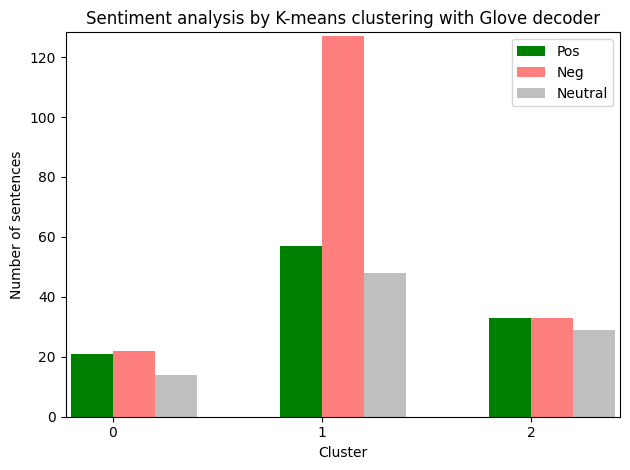

<Figure size 7000x1500 with 0 Axes>

In [190]:
import matplotlib.pyplot as plt
ind = np.arange(3)
plt.bar(ind,dict_for_cluster_positive_glove.values(),0.2,label = 'Pos',color='green')
plt.bar(ind+0.2,dict_for_cluster_neutral_glove.values(),0.2,color='red',label = 'Neg',alpha=0.5)
plt.bar(ind+0.4,dict_for_cluster_negative_glove.values(),0.2,color='gray',label = 'Neutral',alpha=0.5)
plt.legend()
plt.xticks(size = 10)
plt.title("Sentiment analysis by K-means clustering with Glove decoder")
plt.xlabel("Cluster")
plt.ylabel("Number of sentences")
plt.margins(0.01)
plt.xticks(ind + 0.2 / 2, ('0', '1', '2'))
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()

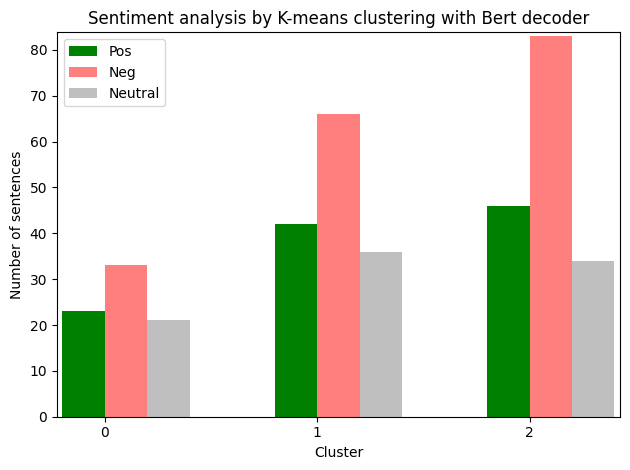

<Figure size 7000x1500 with 0 Axes>

In [191]:
import matplotlib.pyplot as plt
ind = np.arange(3)
plt.bar(ind,dict_for_cluster_positive_bert.values(),0.2,label = 'Pos',color='green')
plt.bar(ind+0.2,dict_for_cluster_neutral_bert.values(),0.2,color='red',label = 'Neg',alpha=0.5)
plt.bar(ind+0.4,dict_for_cluster_negative_bert.values(),0.2,color='gray',label = 'Neutral',alpha=0.5)
plt.legend()
plt.xticks(size = 10)
plt.title("Sentiment analysis by K-means clustering with Bert decoder")
plt.xlabel("Cluster")
plt.ylabel("Number of sentences")
plt.margins(0.01)
plt.xticks(ind + 0.2 / 2, ('0', '1', '2'))
plt.tight_layout()
plt.figure(figsize=(70, 15))
plt.show()